In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [2]:

# Load the data
df = pd.read_csv("data_export4.csv")


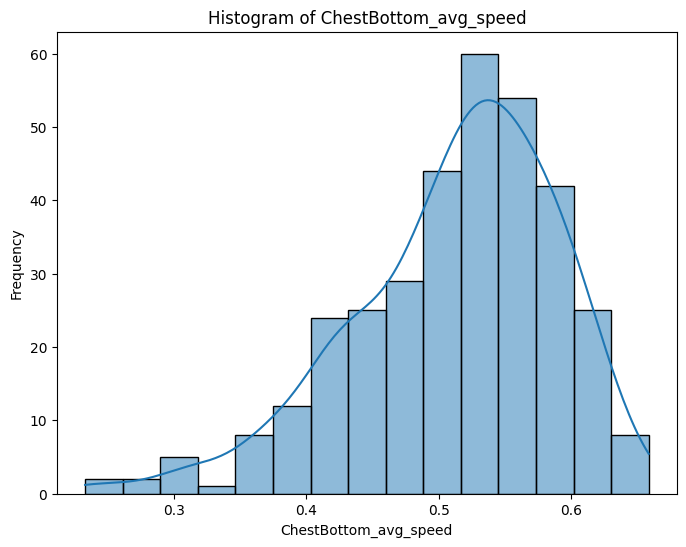

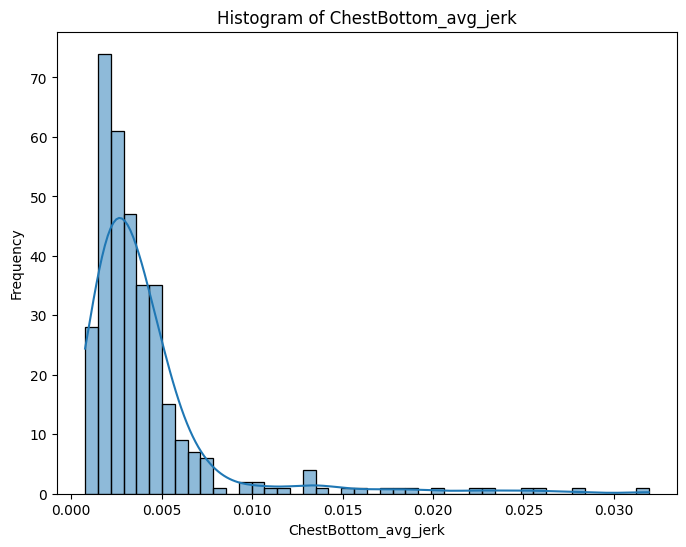

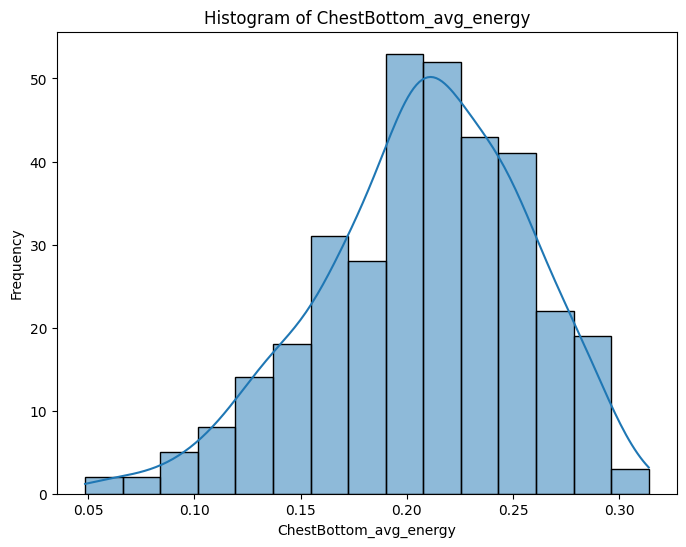

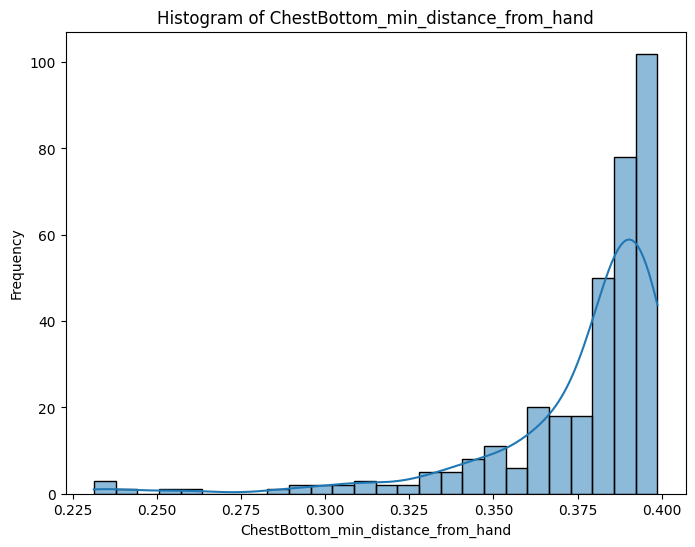

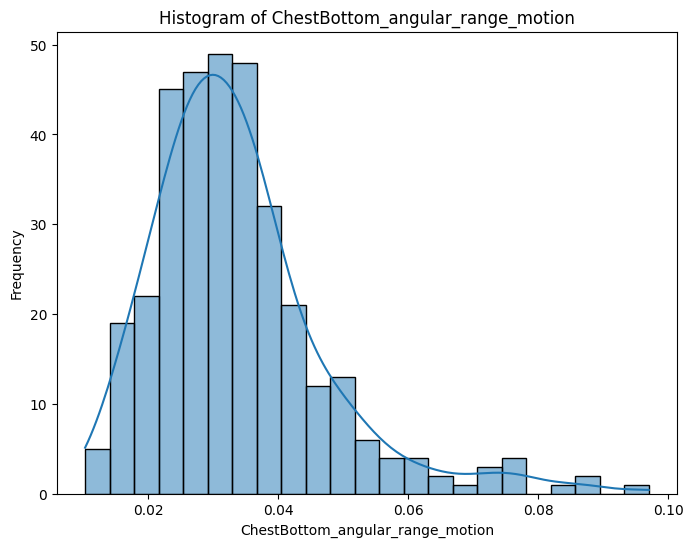

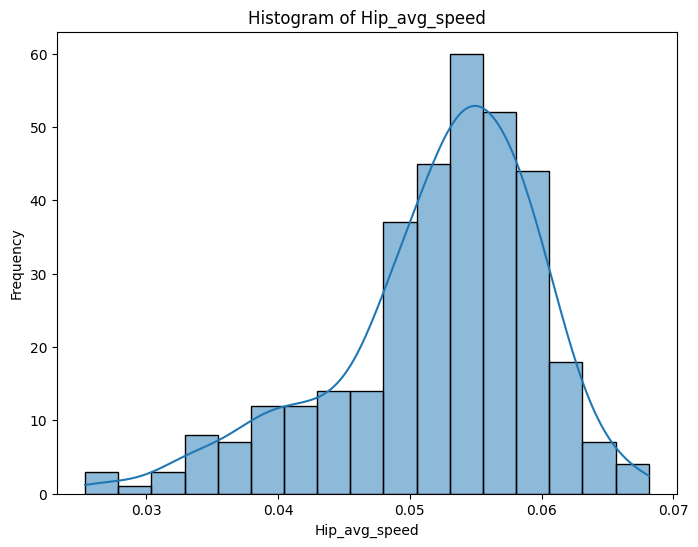

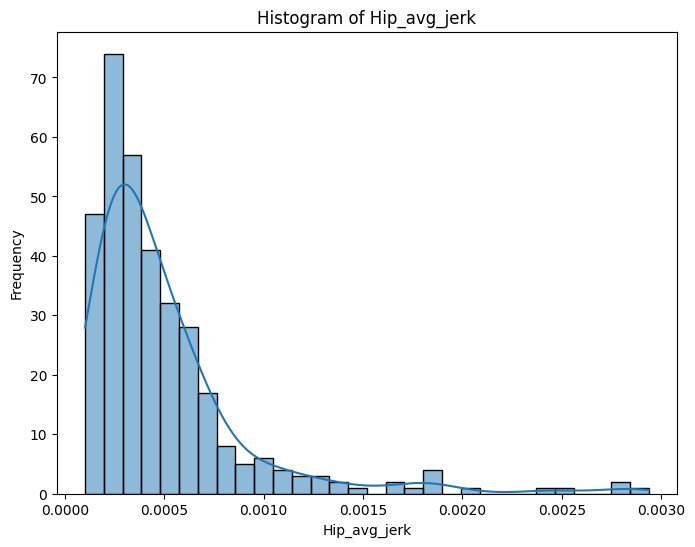

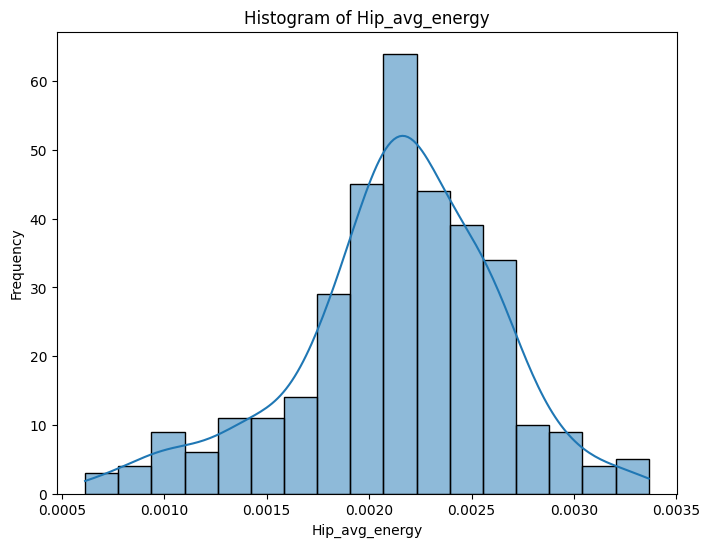

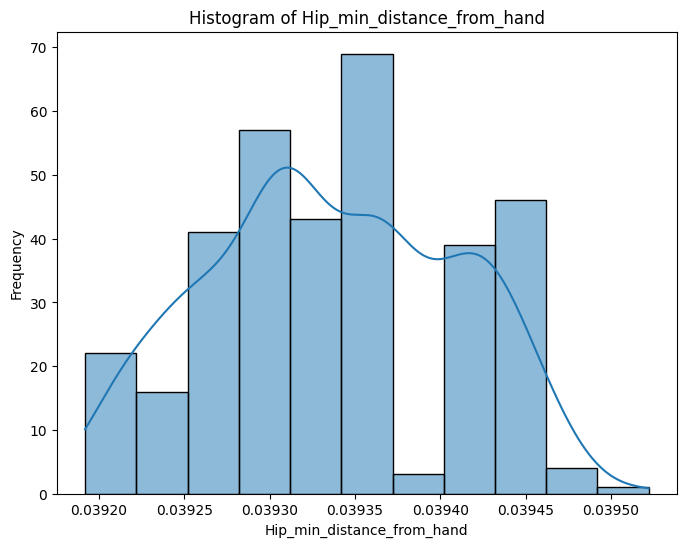

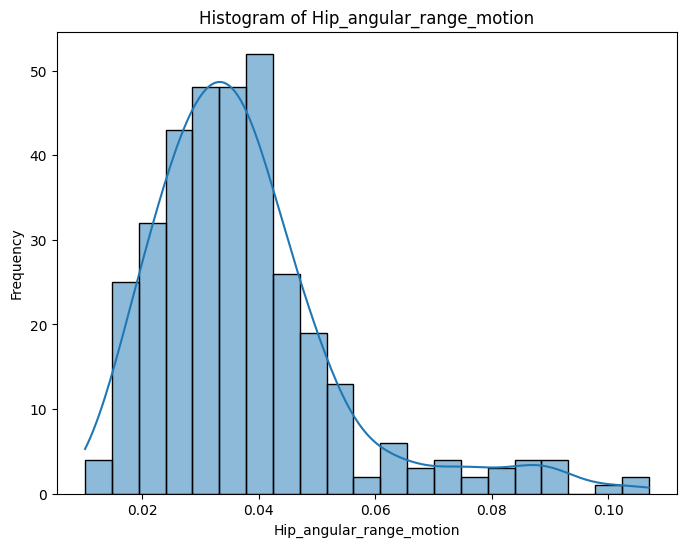

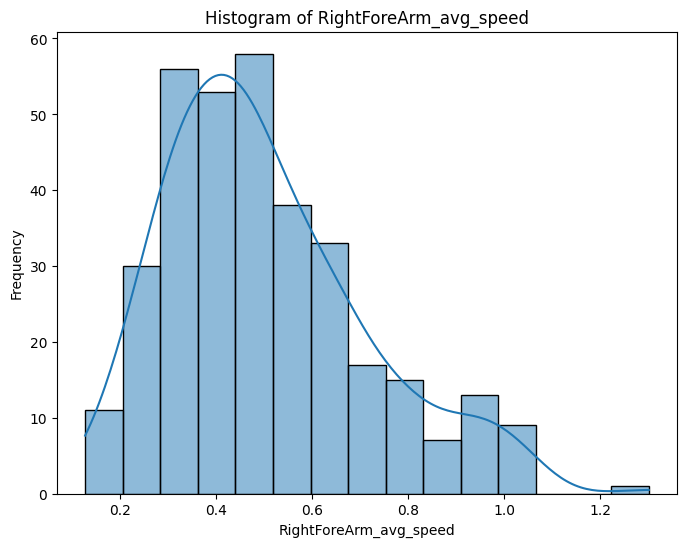

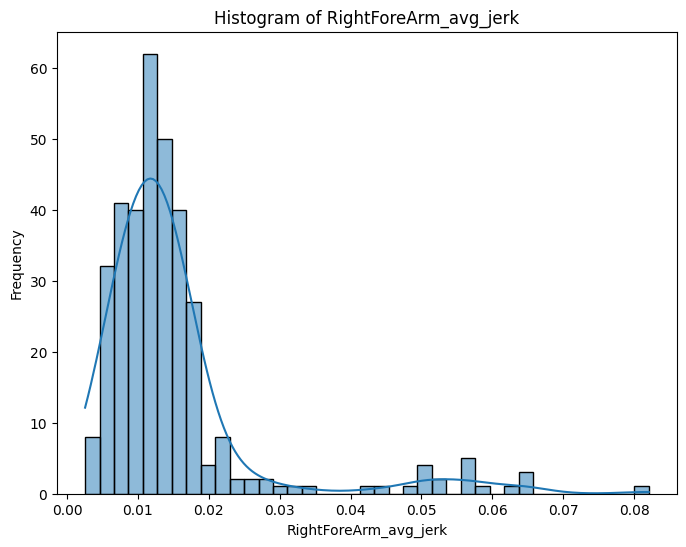

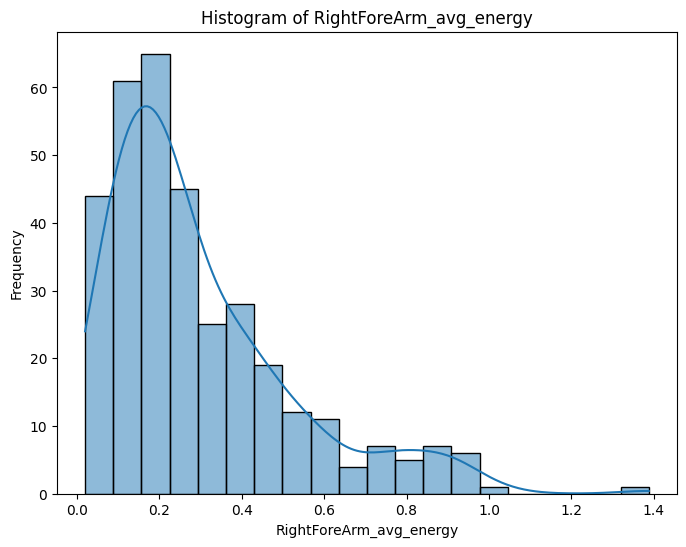

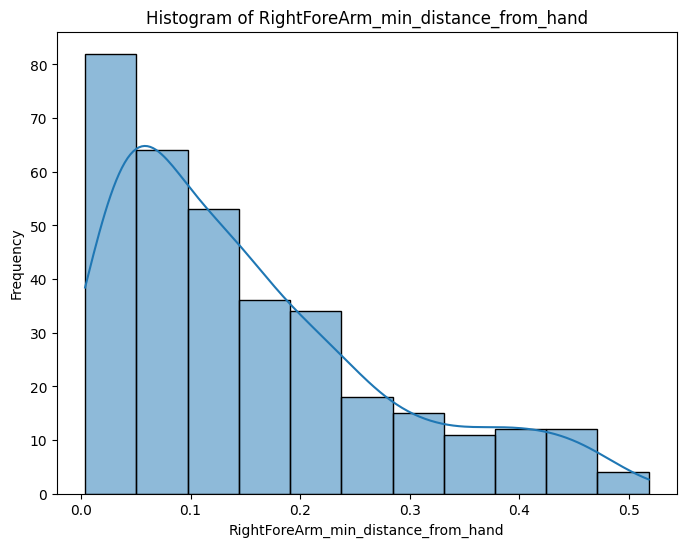

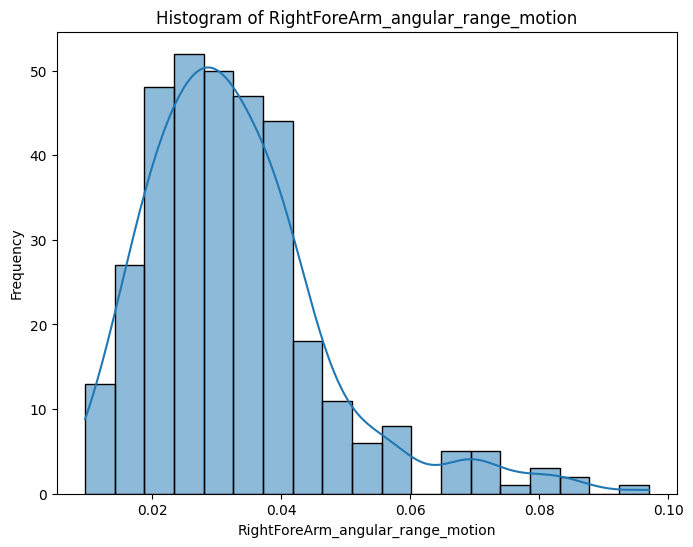

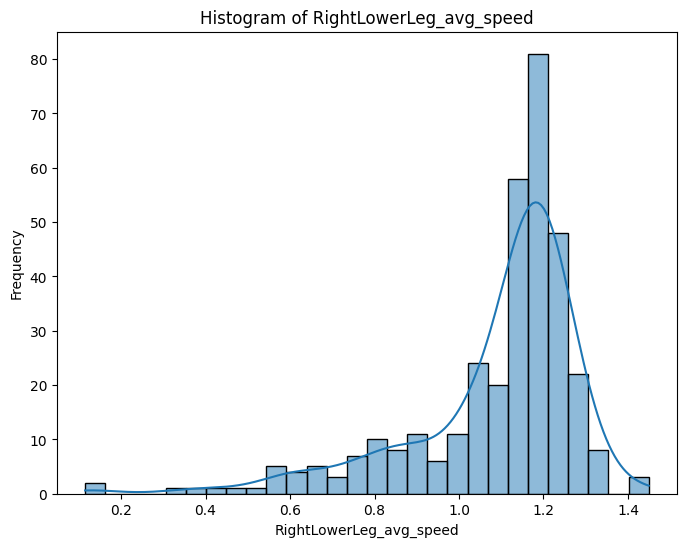

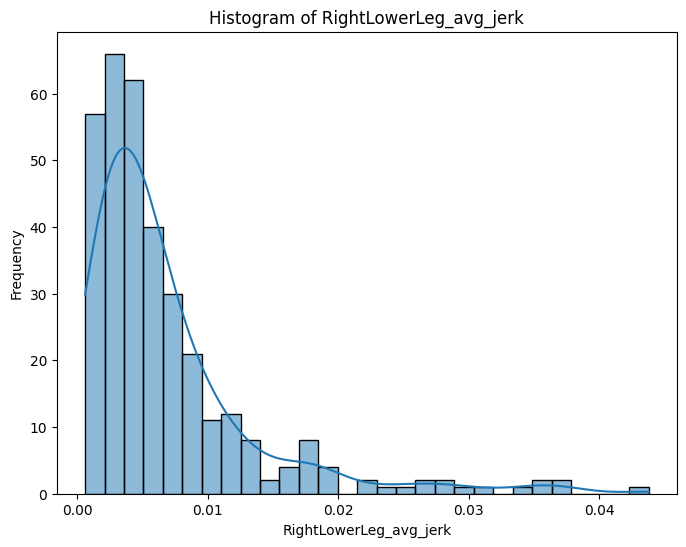

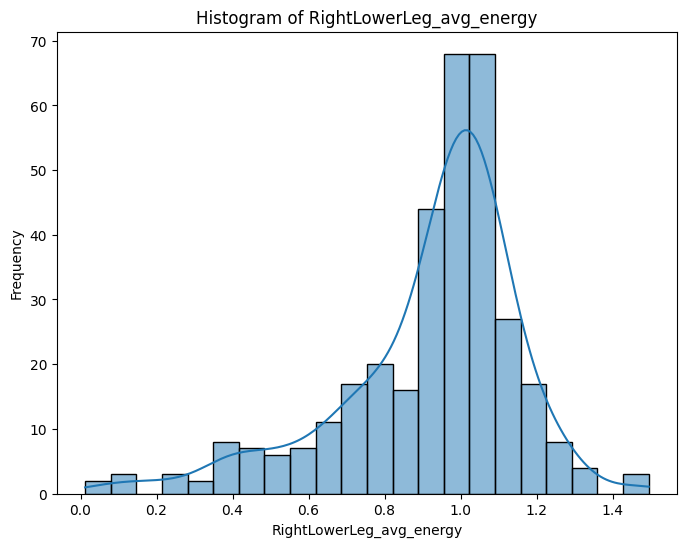

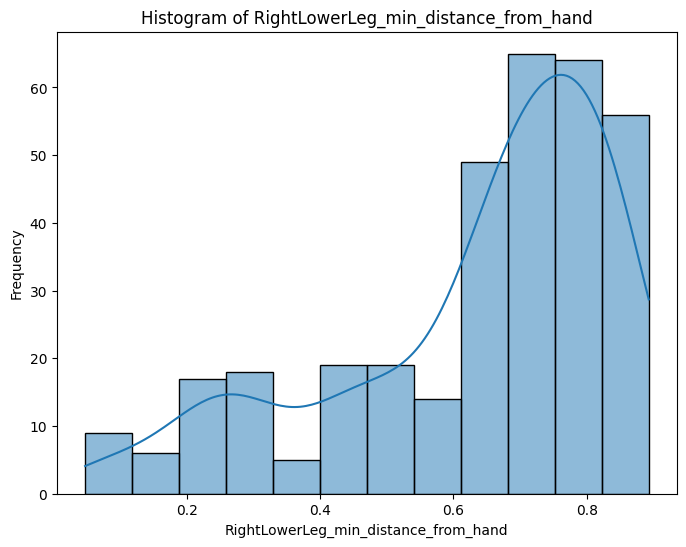

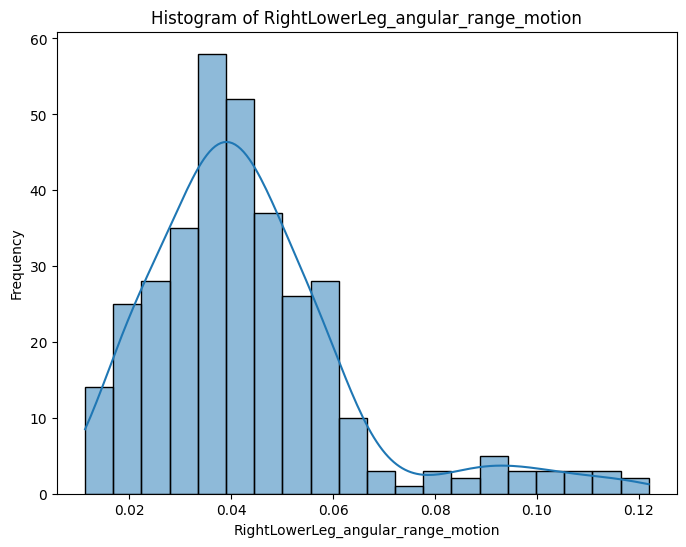

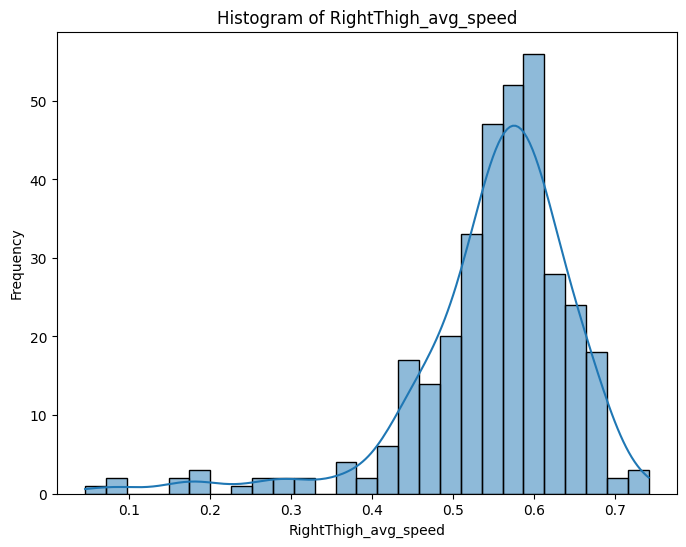

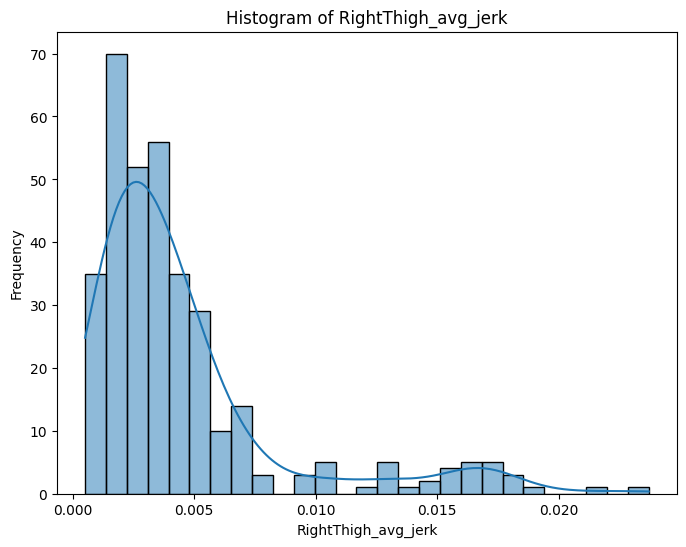

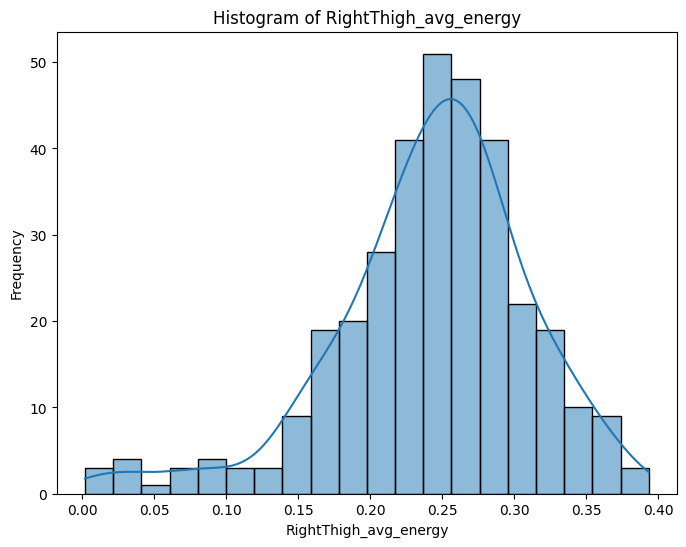

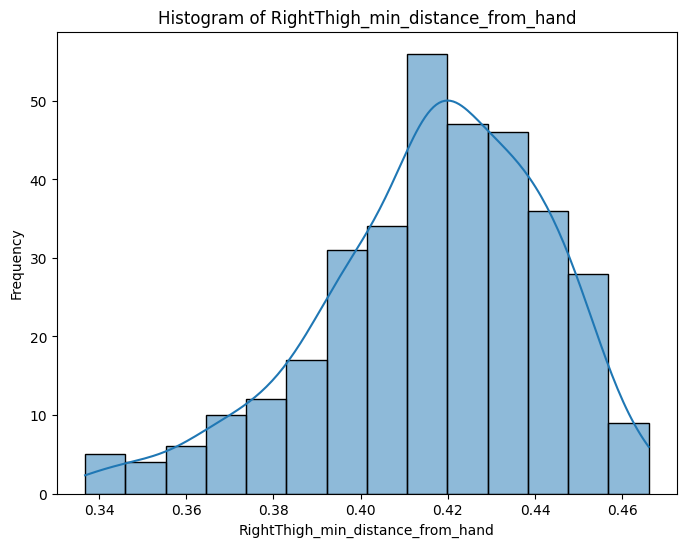

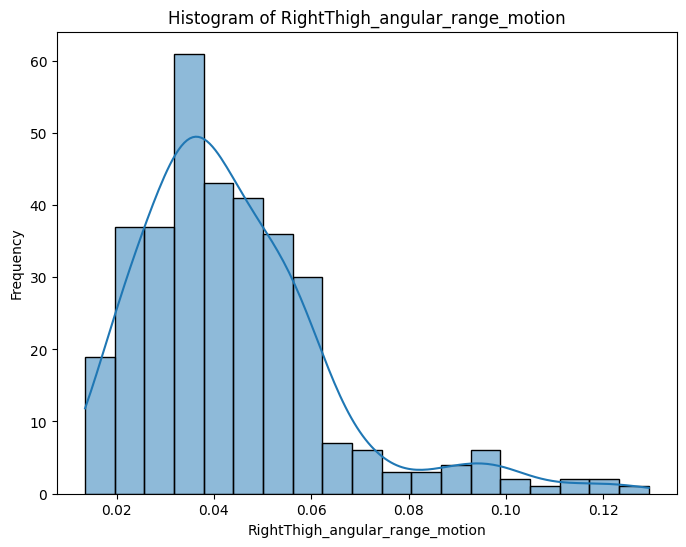

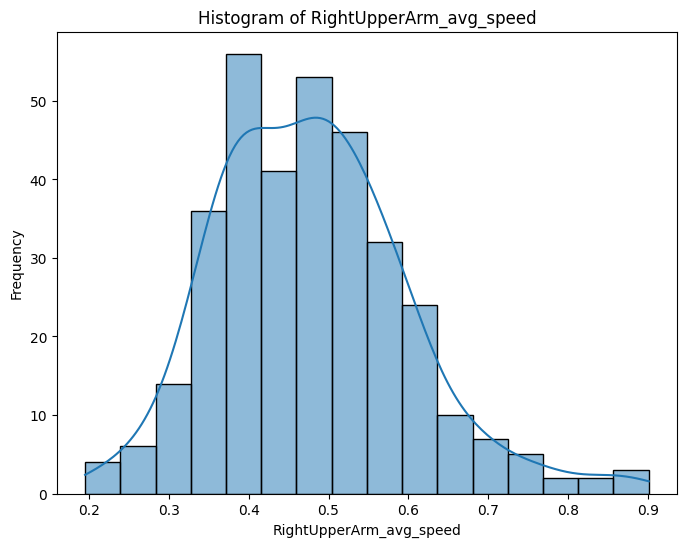

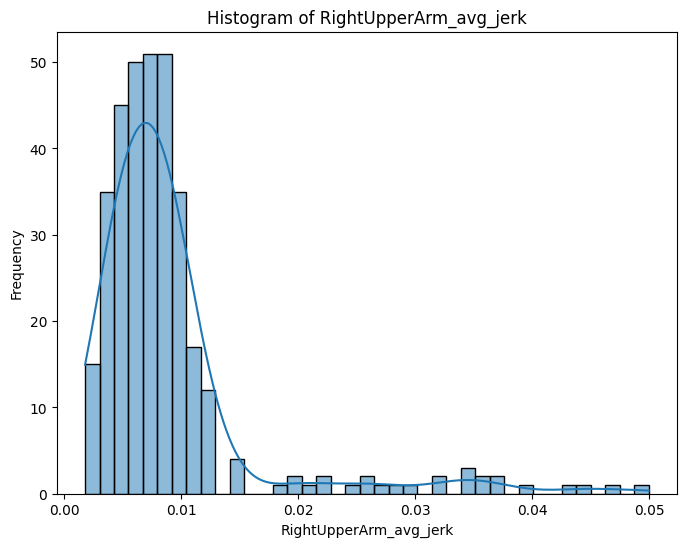

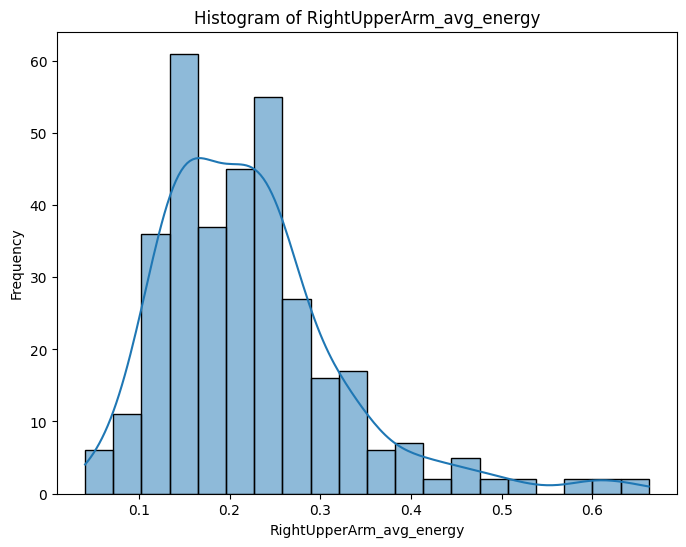

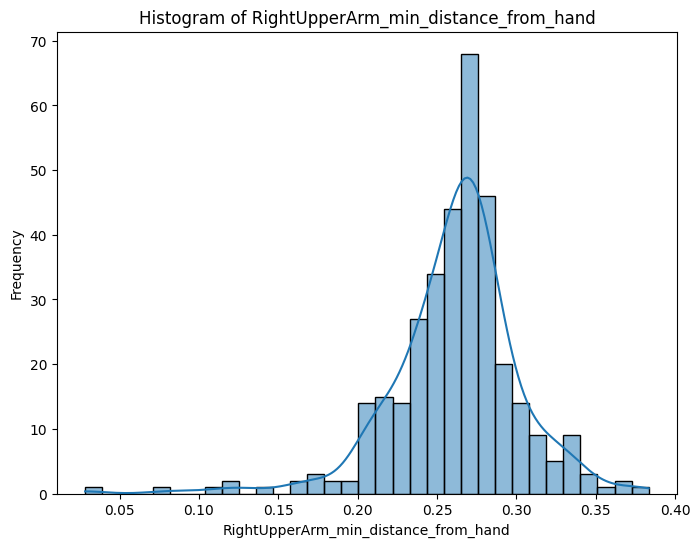

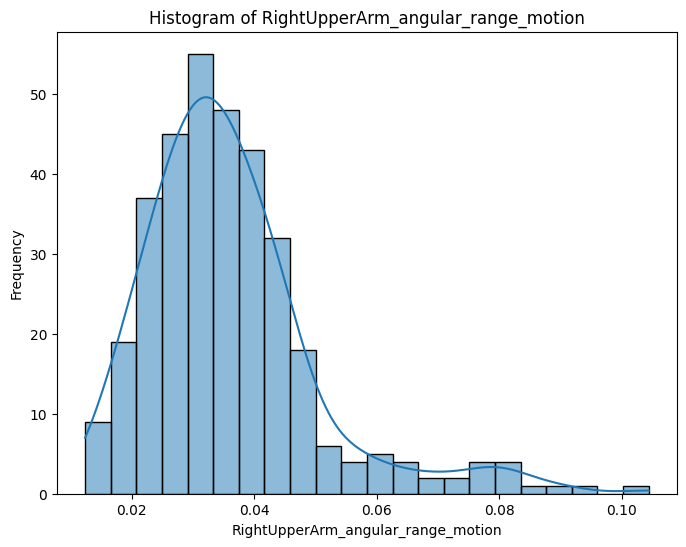

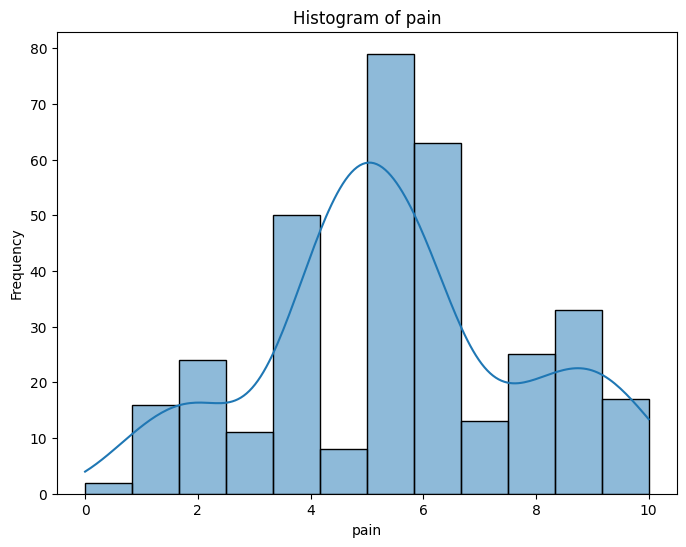

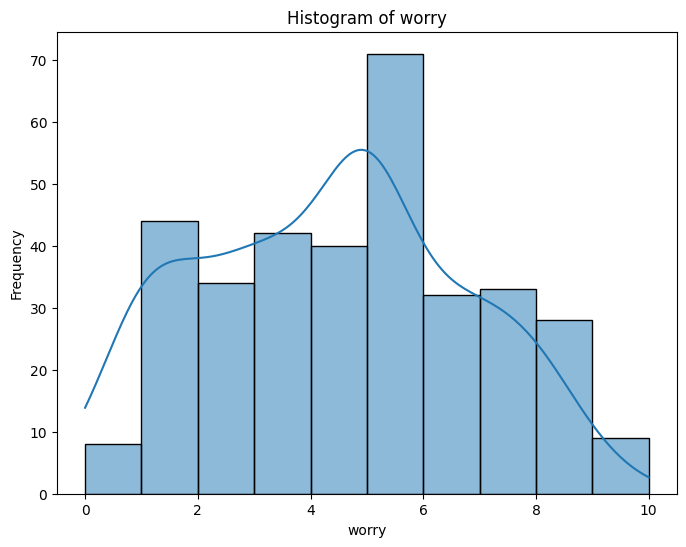

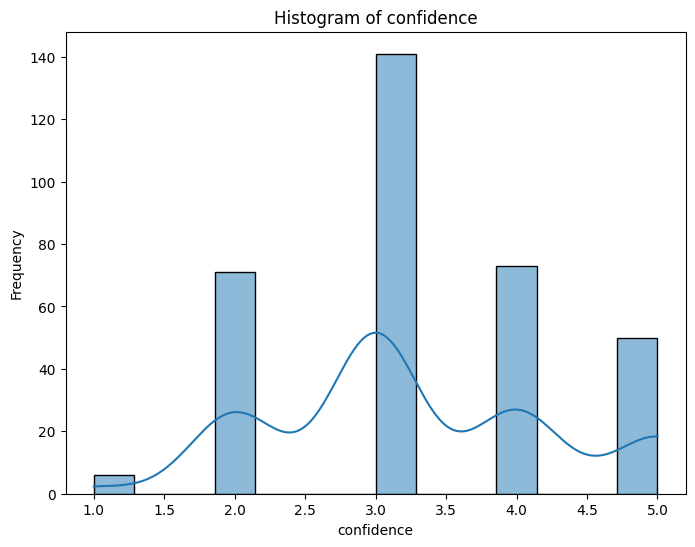

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# First, let's filter out the categorical columns and numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Plot histograms for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


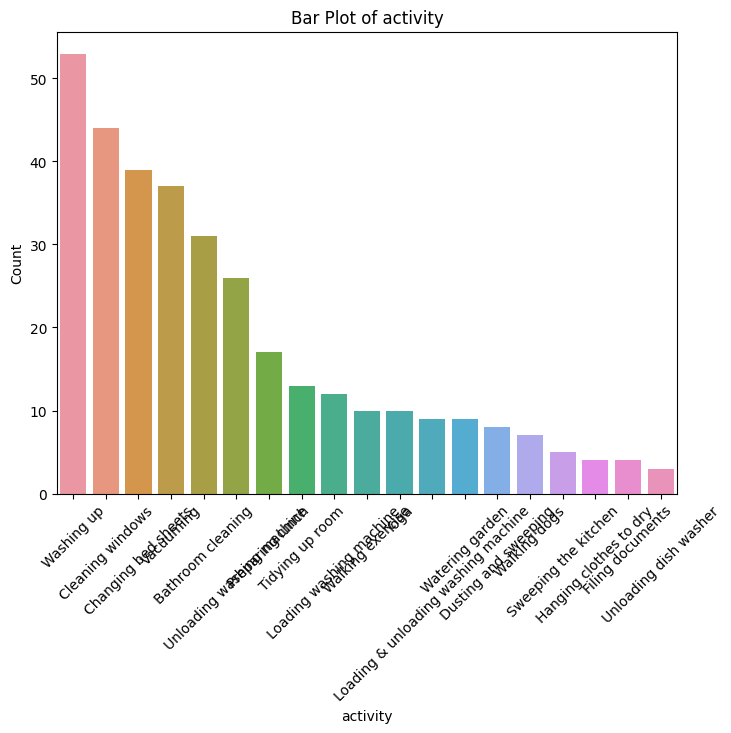

In [5]:
# Plot bar plots for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

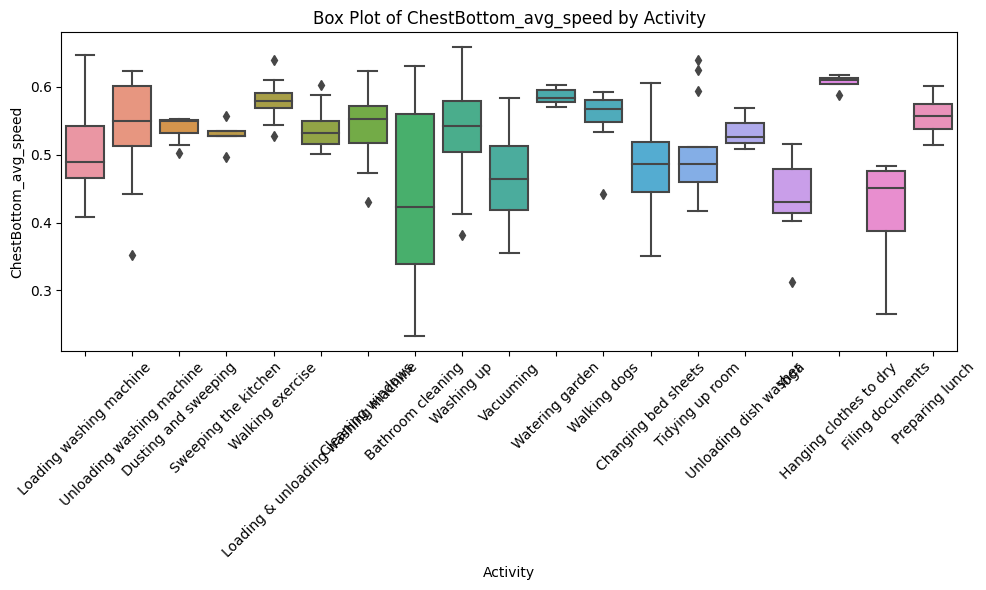

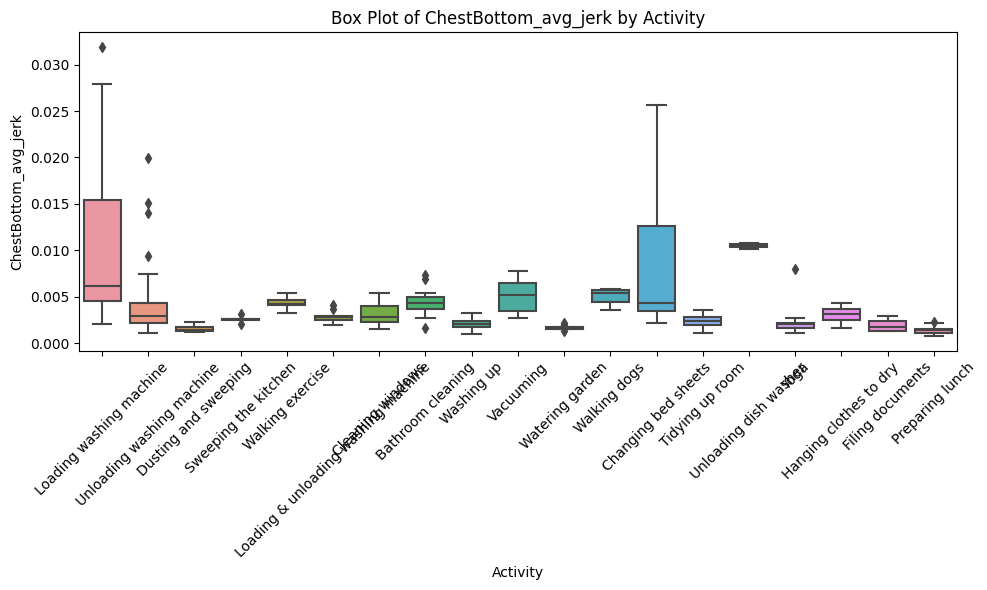

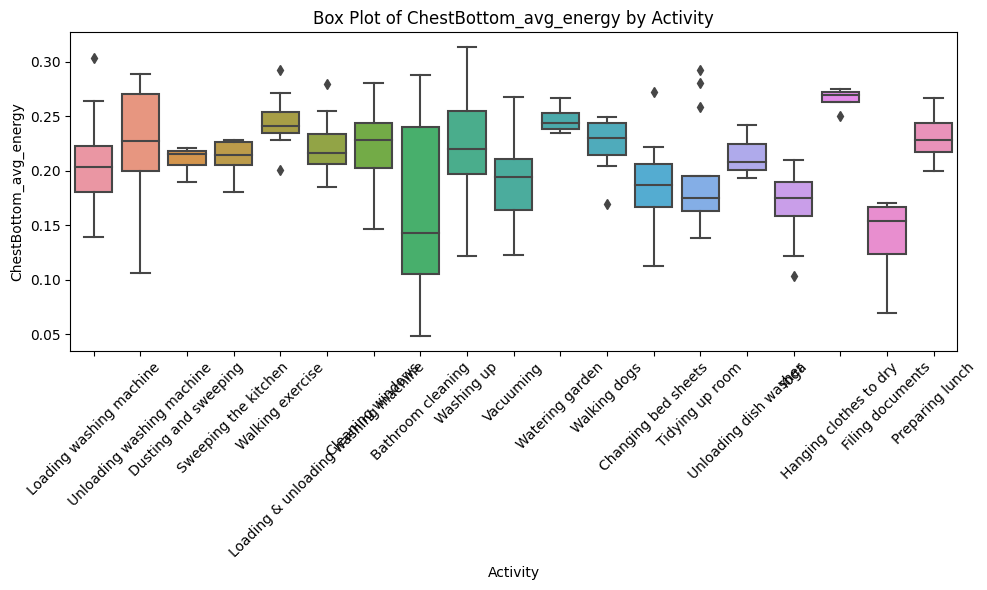

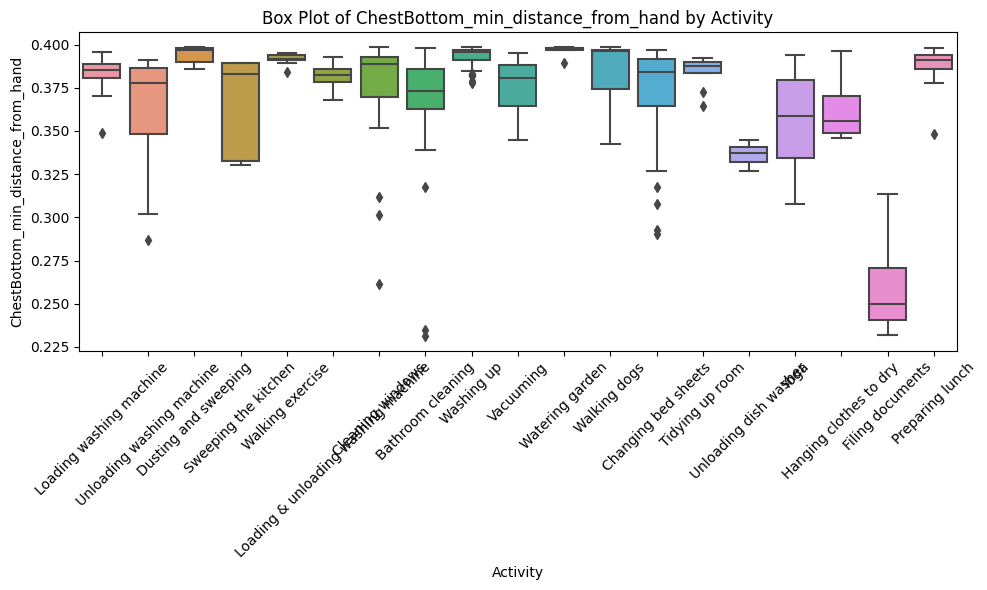

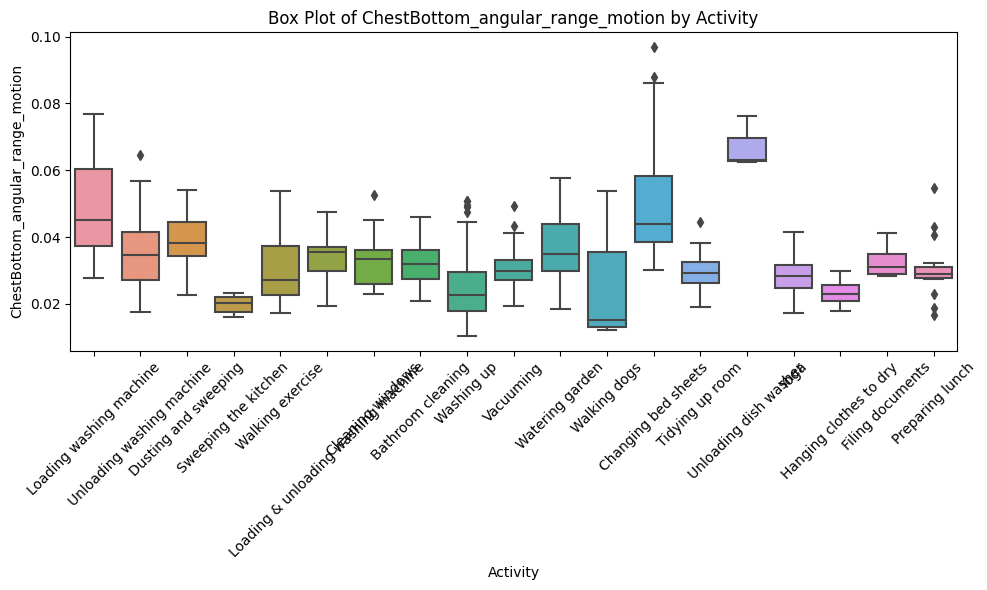

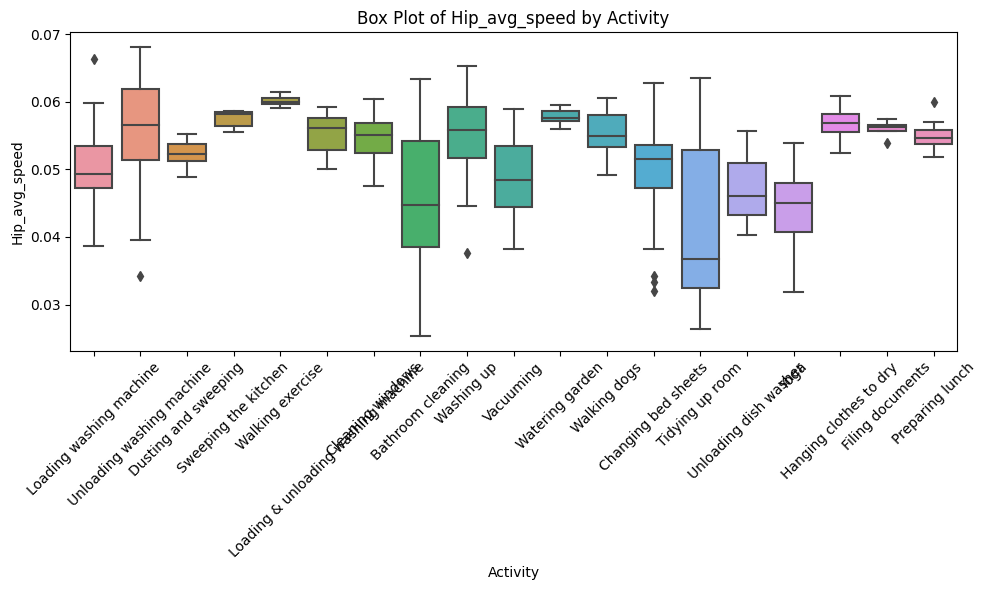

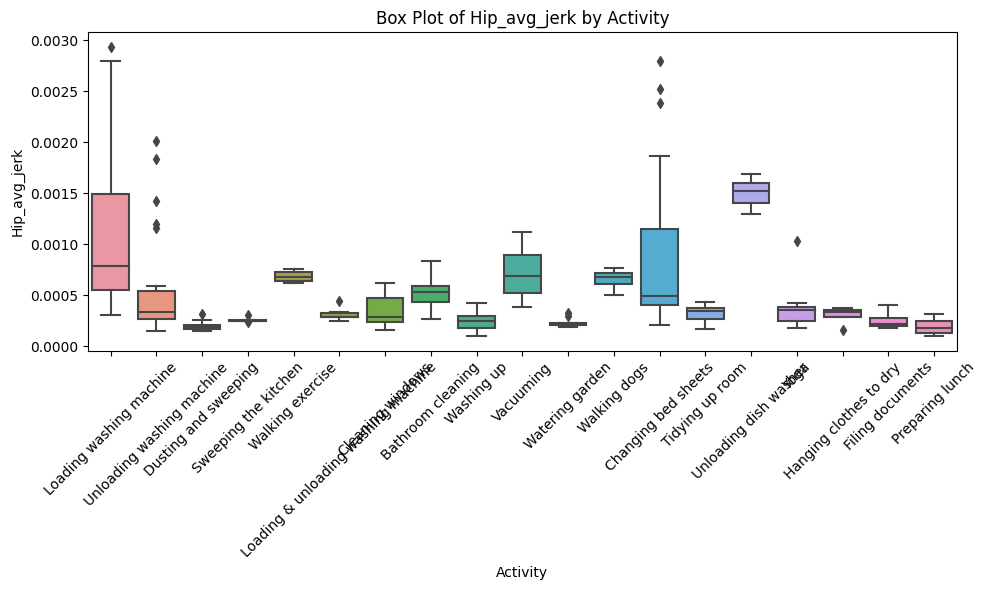

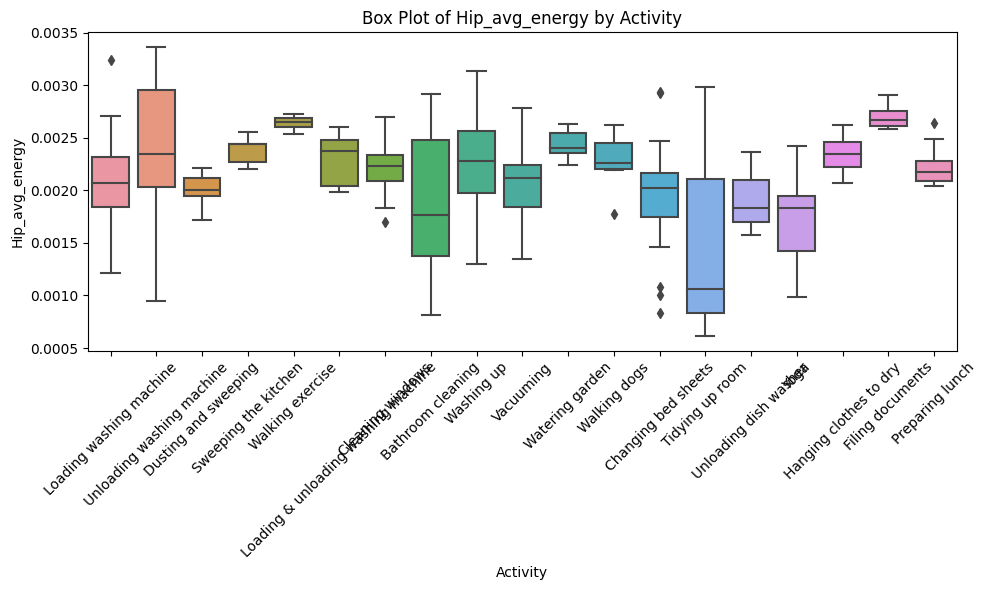

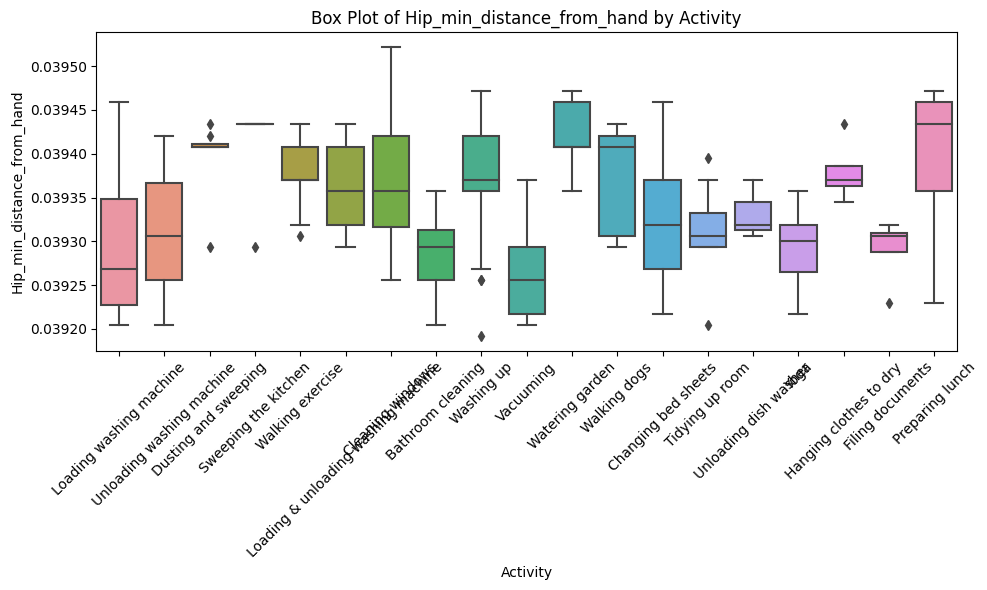

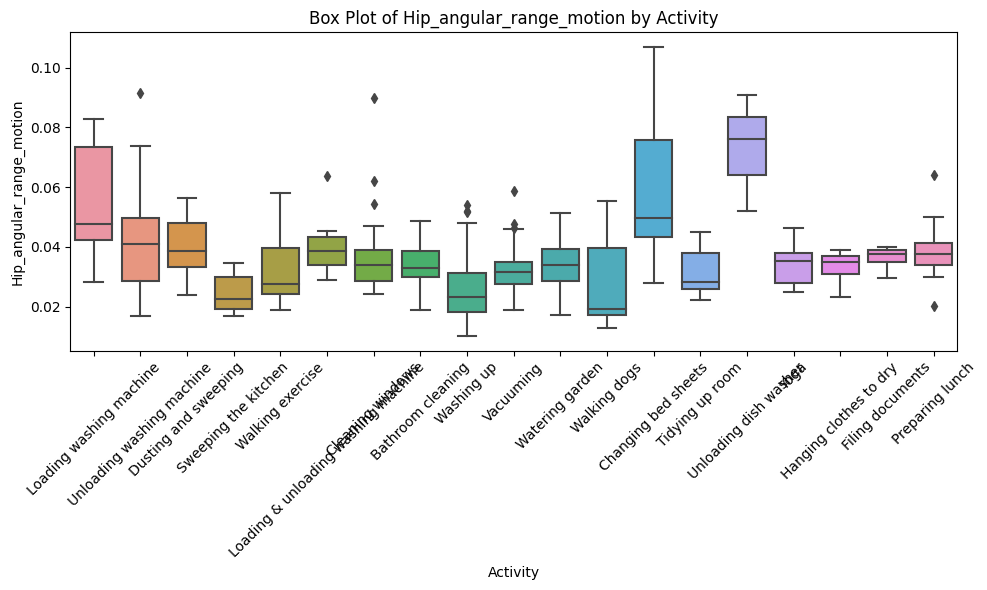

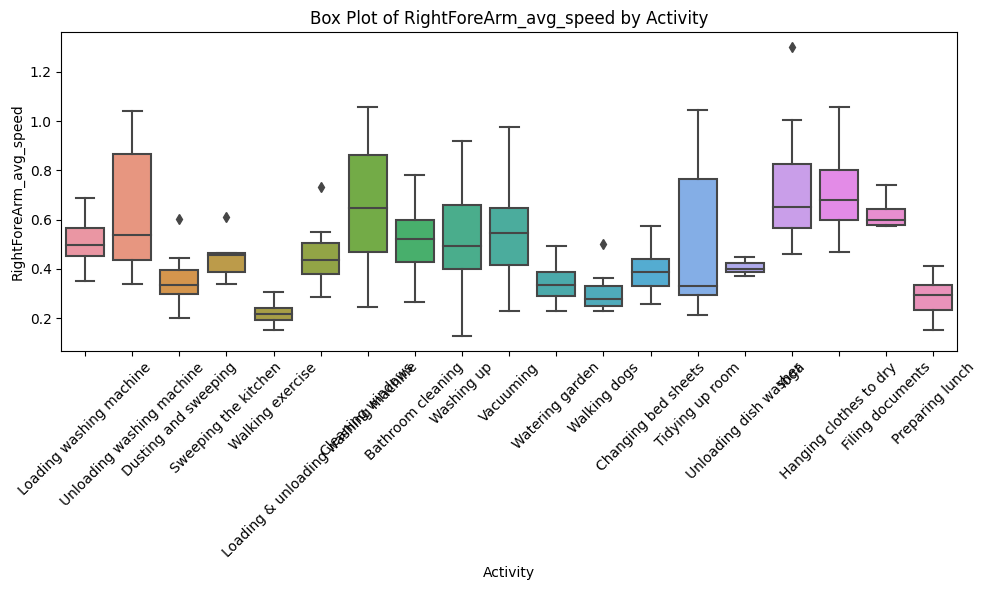

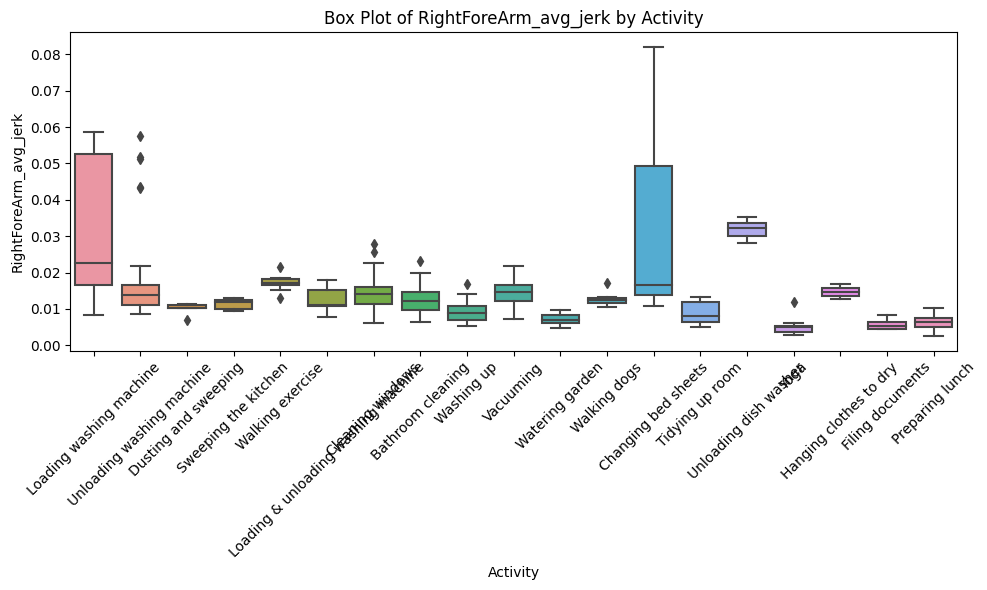

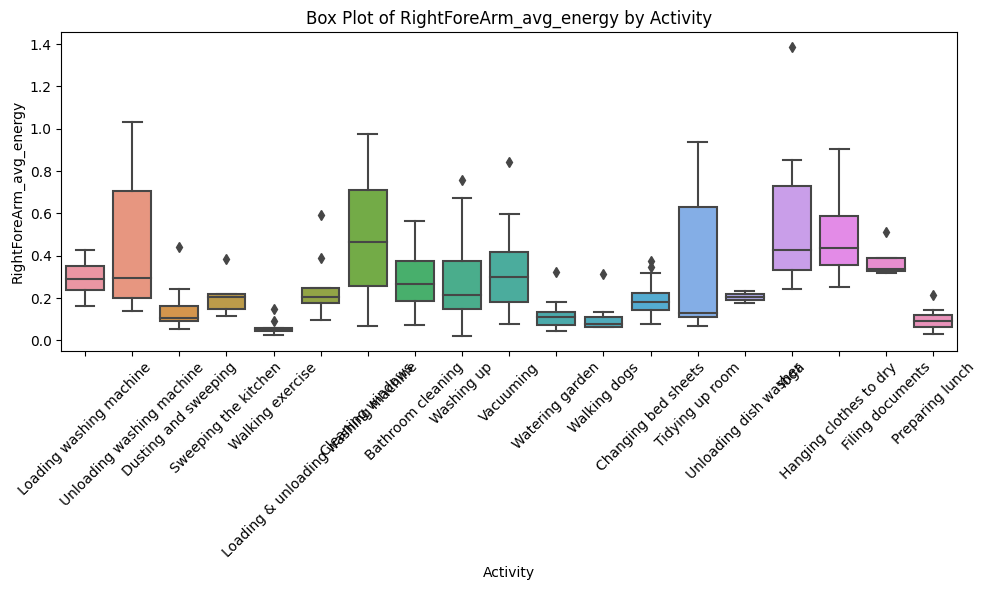

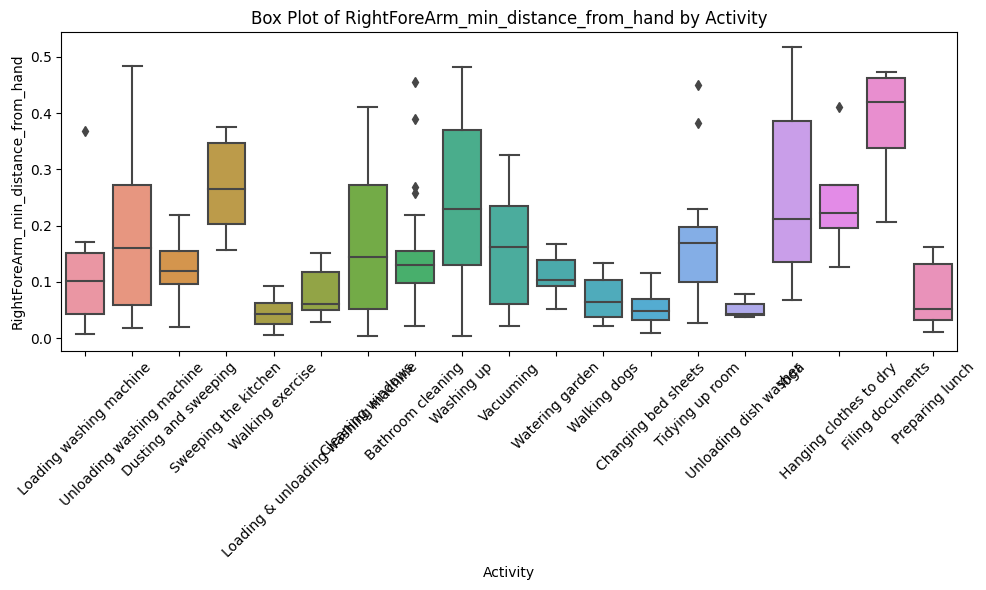

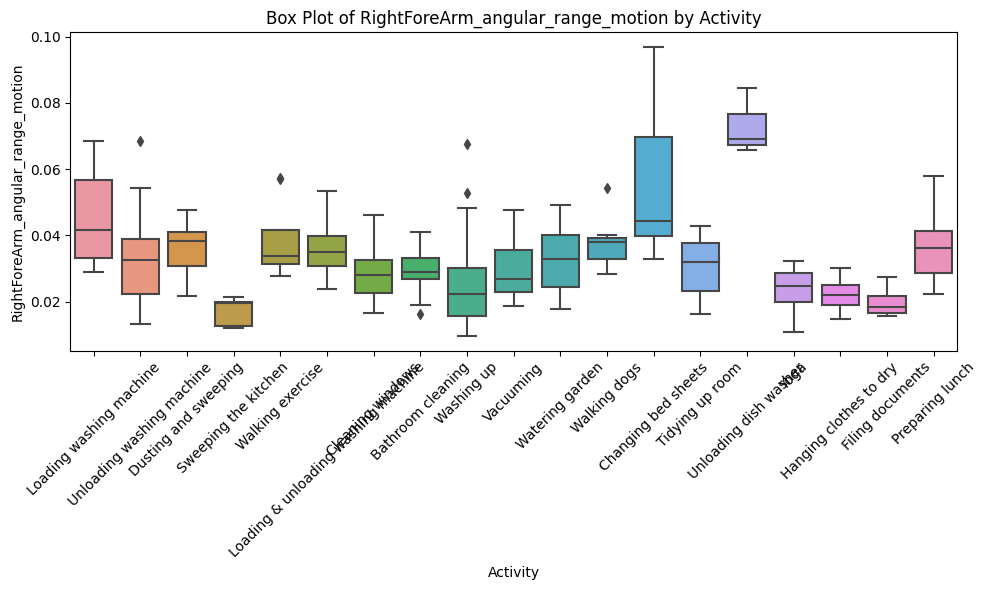

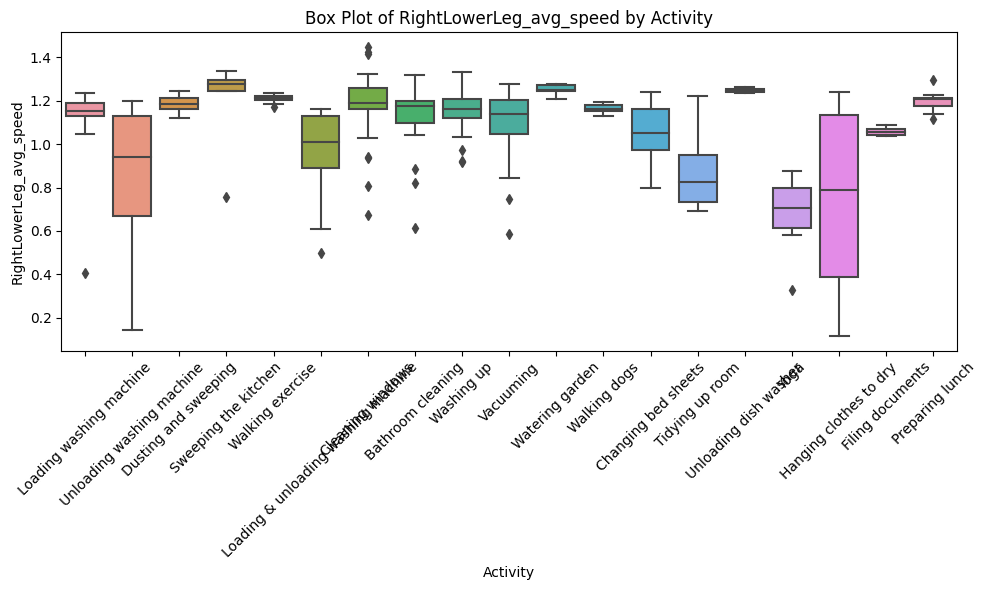

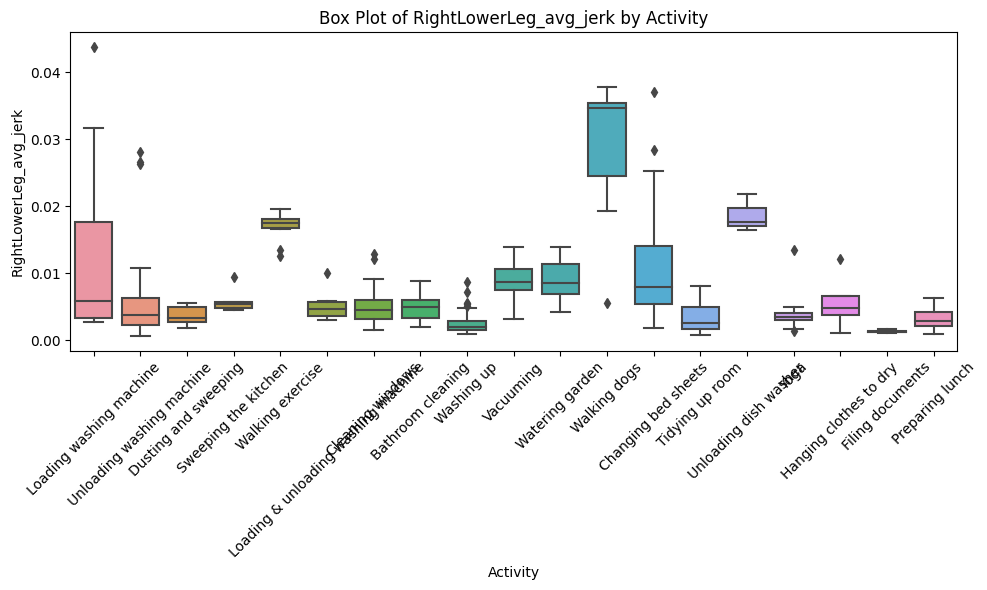

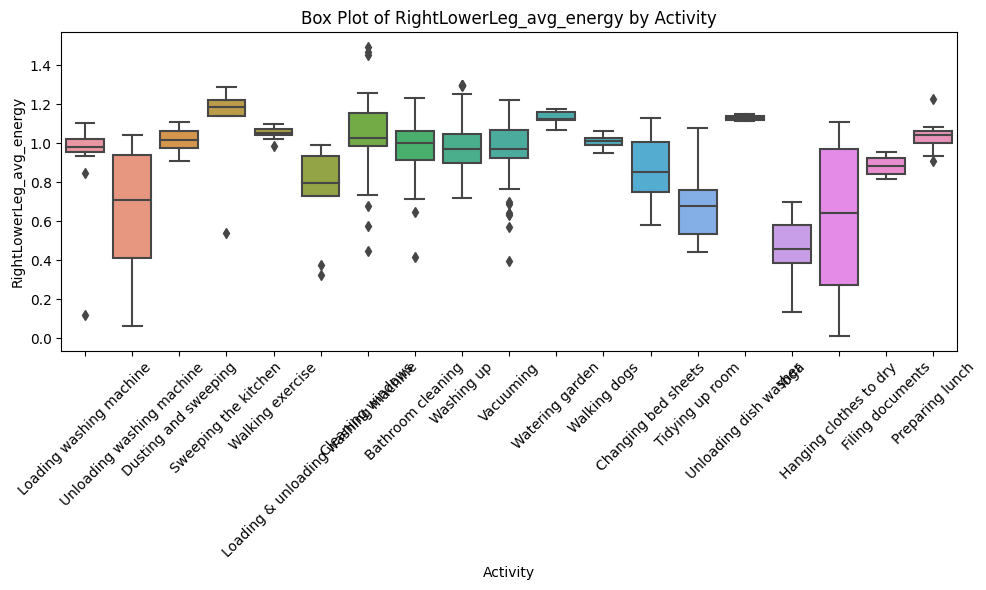

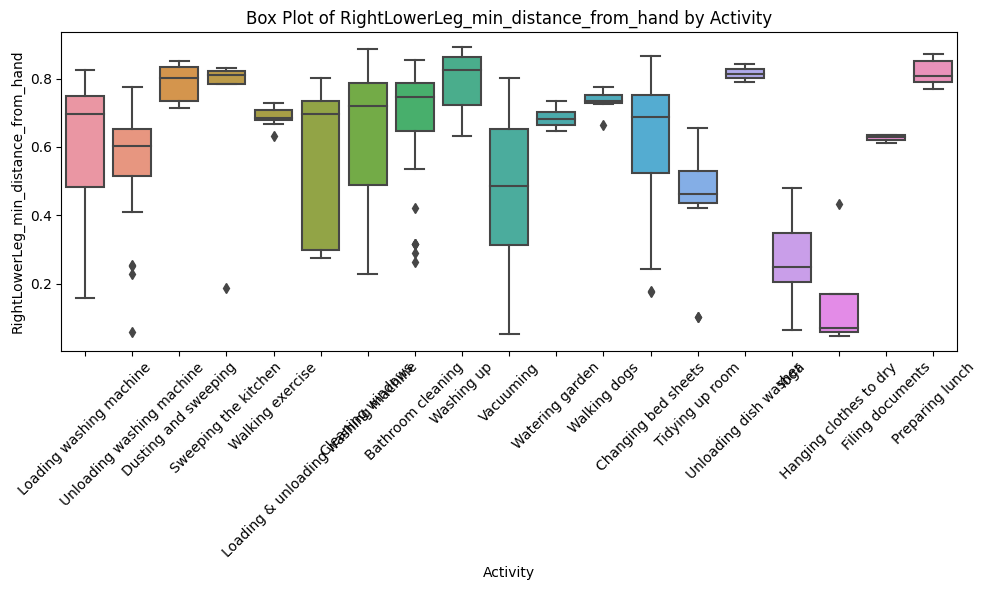

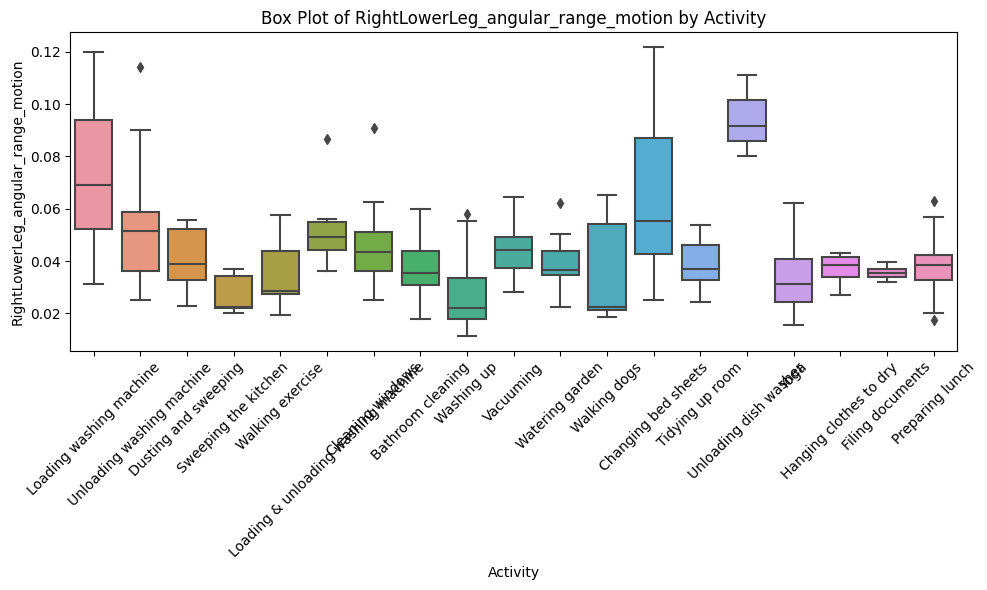

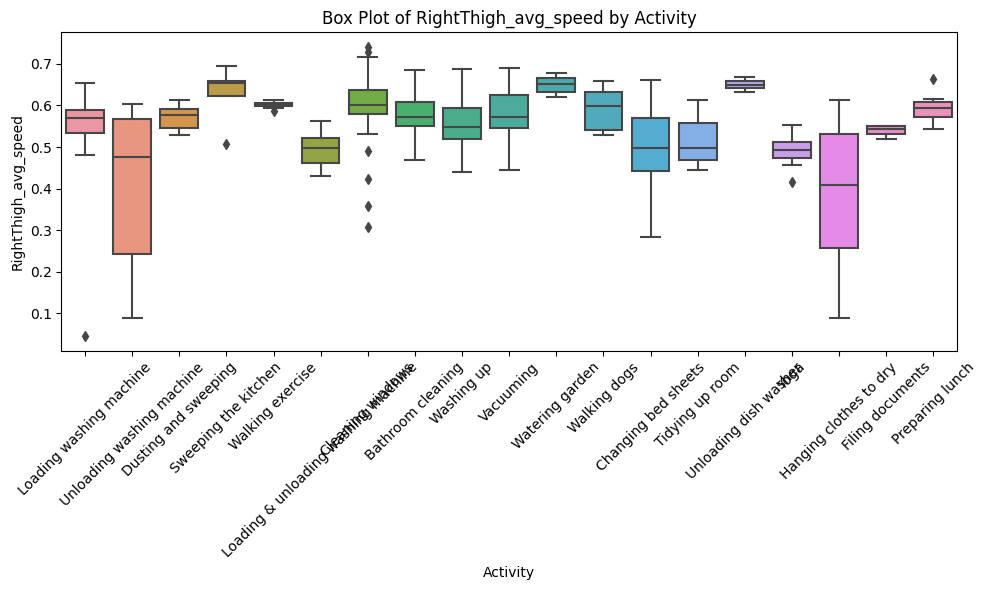

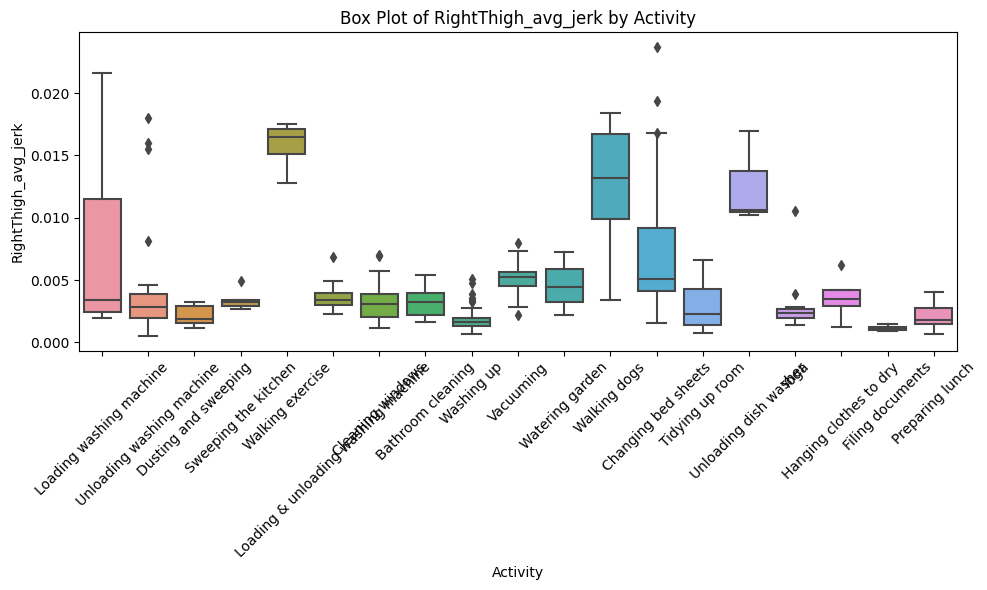

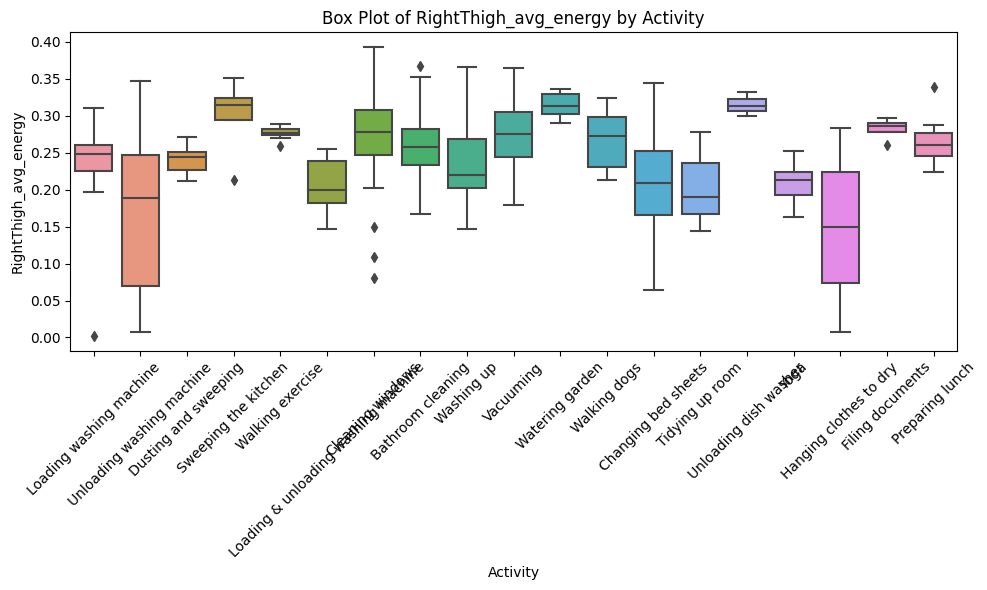

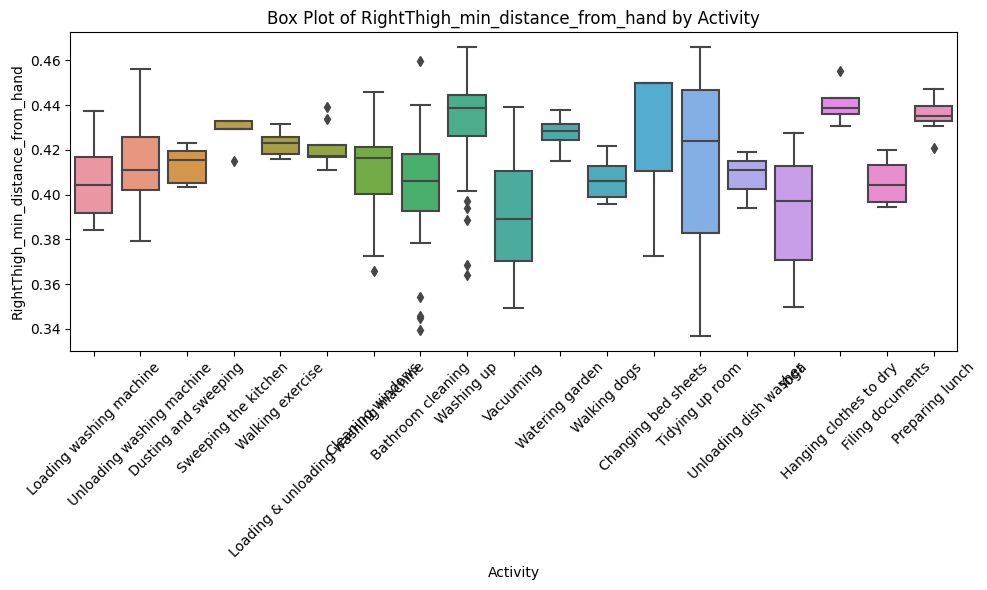

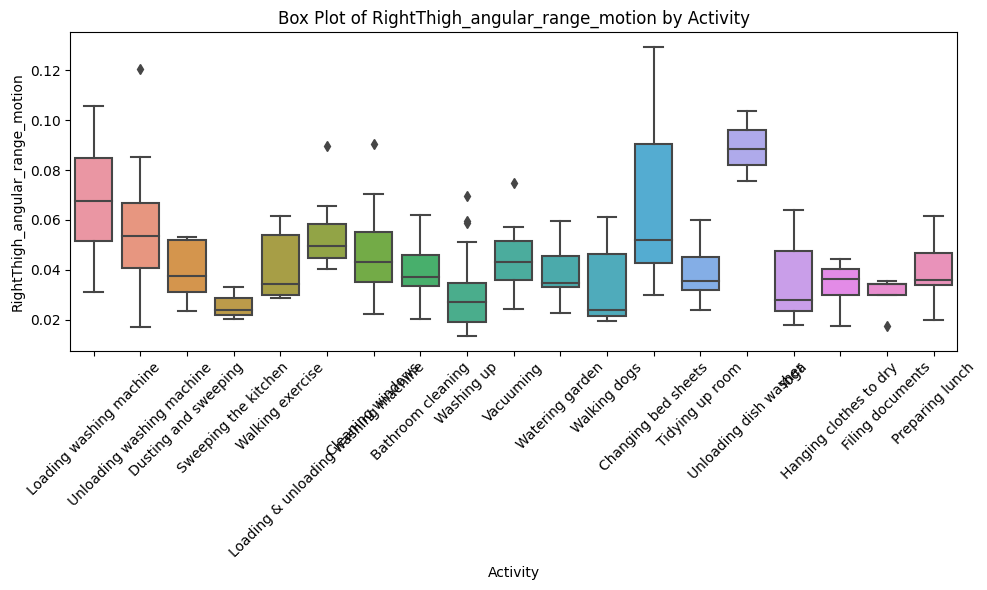

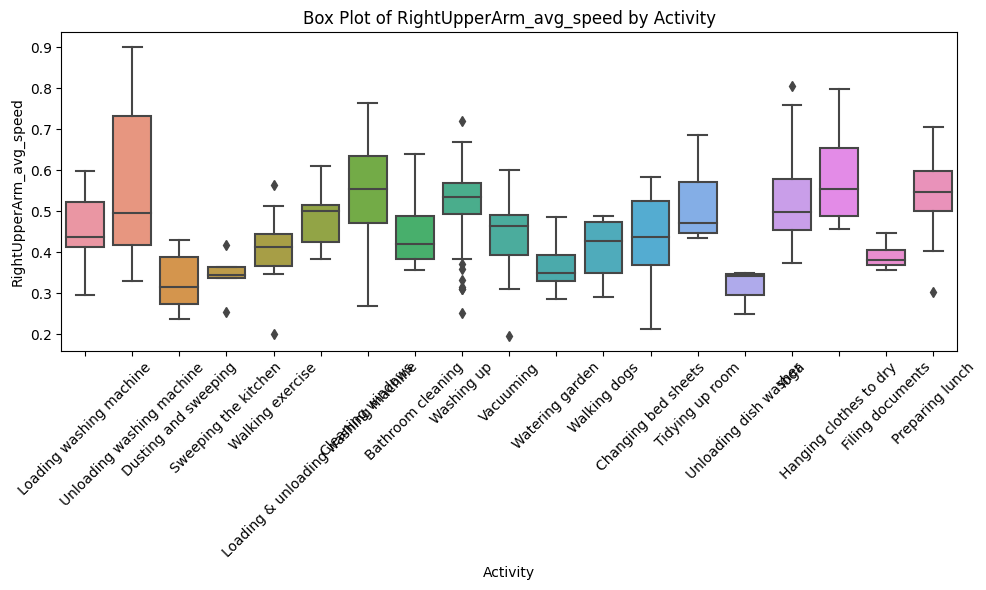

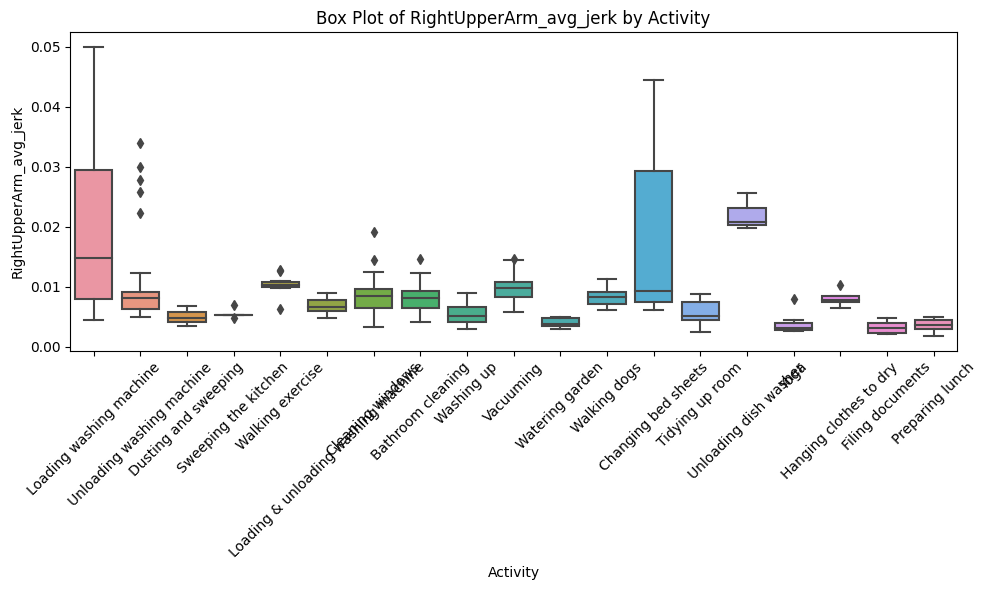

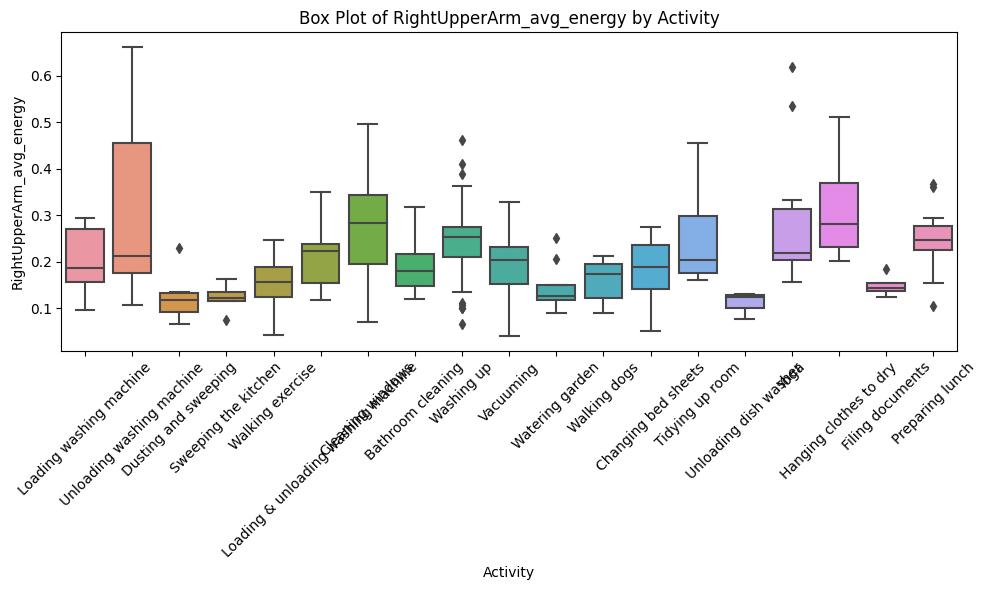

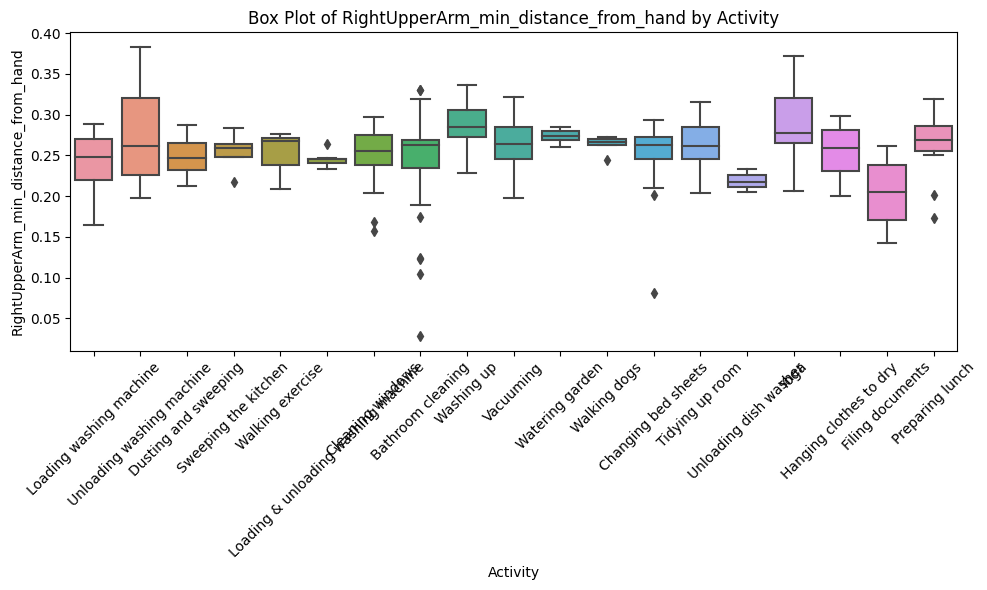

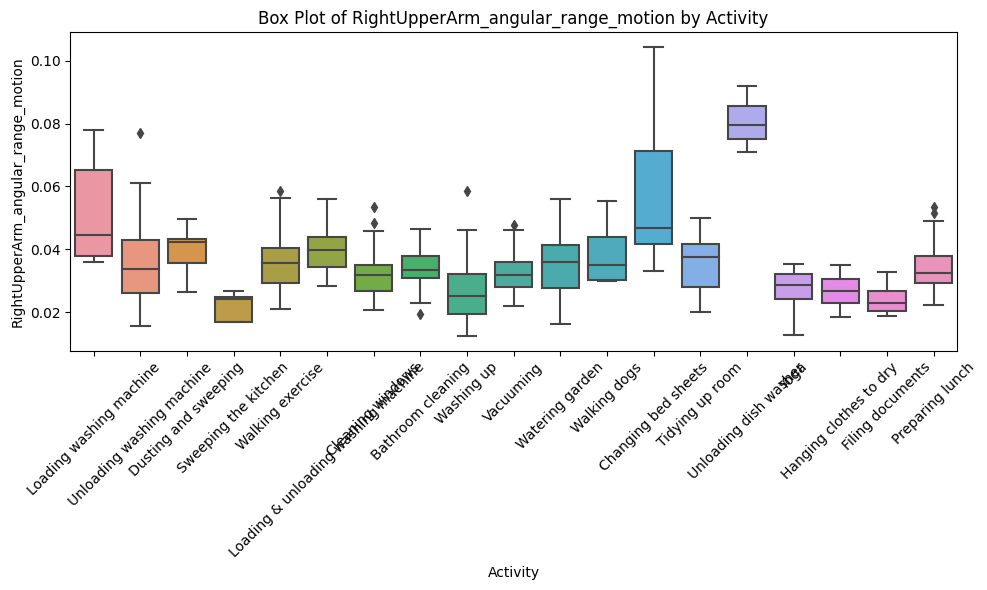

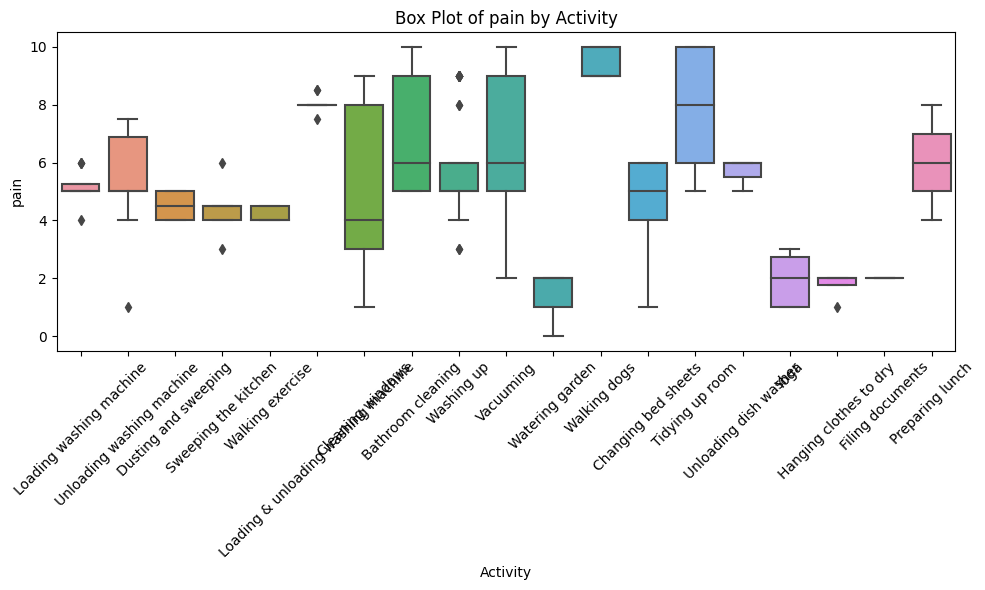

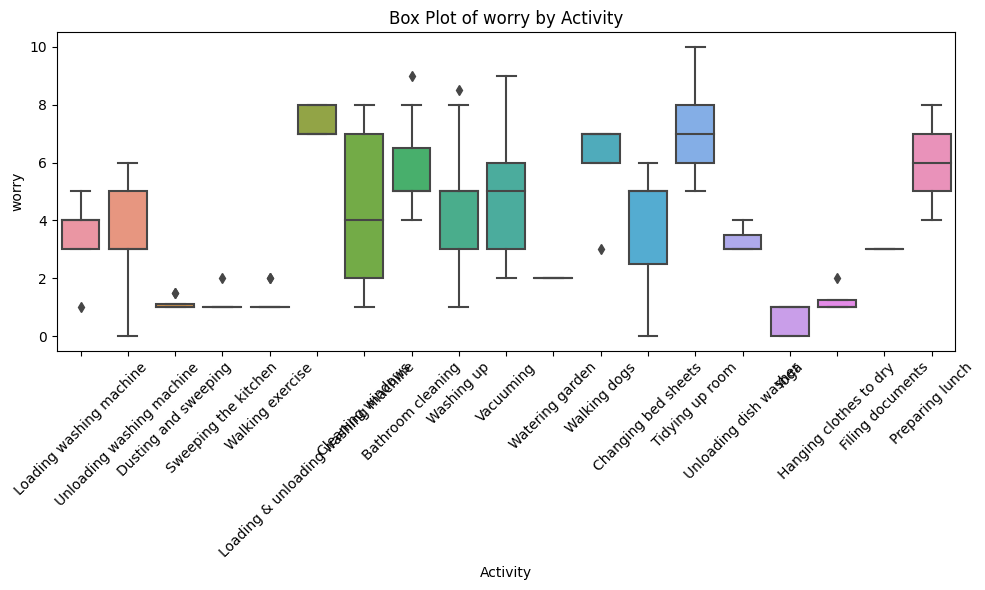

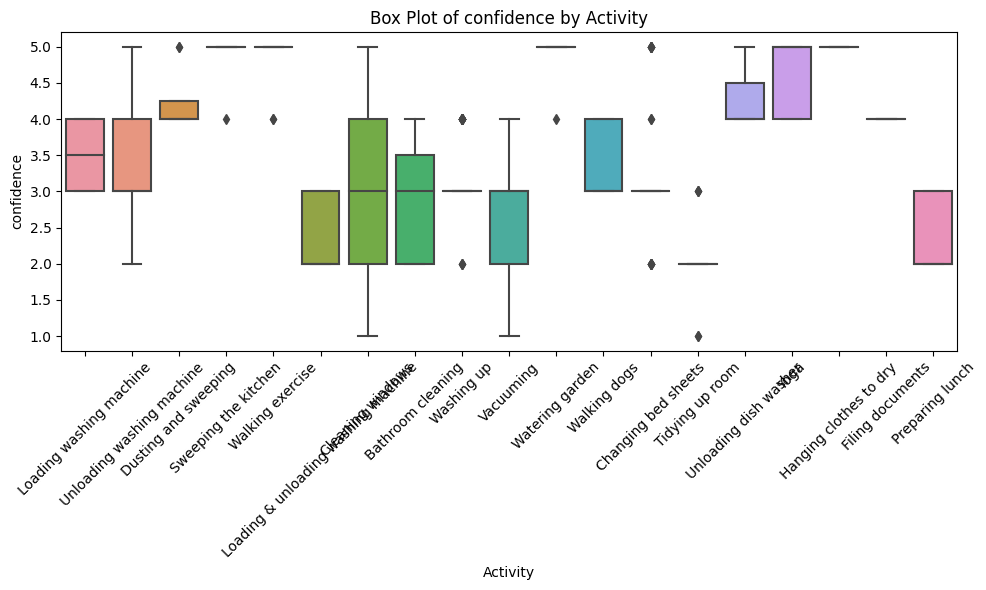

In [6]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create box plots for each numeric column categorized by 'activity'
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='activity', y=col)
    plt.title(f'Box Plot of {col} by Activity')
    plt.xlabel('Activity')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [3]:
# Categorize the 'pain' values into low, medium, and high categories
bin_edges = [-1, 3, 7, float('inf')]
bin_labels = ['Low', 'Medium', 'High']
class_names = ['Low', 'Medium', 'High']
df['pain_category'] = pd.cut(df['pain'], bins=bin_edges, labels=bin_labels, right=False)

In [4]:

# Data Preparation
X = df.drop(['pain', 'pain_category'], axis=1)
y = df['pain_category']

In [5]:
# One-hot encode the 'activity' column
X = pd.get_dummies(X, columns=['activity'], prefix='activity')

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_labels = y_train.cat.codes
y_train_tensor = torch.tensor(y_train_labels, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

In [9]:
# Define a custom dataset
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [10]:
train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [11]:
import torch.nn as nn

class ImprovedMLPClassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(ImprovedMLPClassifier, self).__init__()

        # Define layers with dropout and batch normalization
        self.fc_layers = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),  # Batch normalization layer
            nn.Dropout(0.5),     # Dropout layer
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),  # Batch normalization layer
            nn.Dropout(0.3),     # Dropout layer
            nn.Linear(32, num_classes)
        )
        
    def forward(self, x):
        # Forward pass through the layers
        x = self.fc_layers(x)
        return x

# Instantiate the model
input_size = X_train_scaled.shape[1]
num_classes = len(bin_labels)
model = ImprovedMLPClassifier(input_size, num_classes)


In [12]:
# Define loss and optimizer for multi-class classification
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [13]:
# Model Training
num_epochs = 400
for epoch in range(num_epochs):
    model.train()
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/400], Loss: 1.2478
Epoch [2/400], Loss: 1.3323
Epoch [3/400], Loss: 0.7579
Epoch [4/400], Loss: 0.8540
Epoch [5/400], Loss: 0.8708
Epoch [6/400], Loss: 0.7323
Epoch [7/400], Loss: 0.9228
Epoch [8/400], Loss: 0.9156
Epoch [9/400], Loss: 0.7237
Epoch [10/400], Loss: 0.6044
Epoch [11/400], Loss: 0.5658
Epoch [12/400], Loss: 0.4258
Epoch [13/400], Loss: 0.6268
Epoch [14/400], Loss: 0.5275
Epoch [15/400], Loss: 0.6905
Epoch [16/400], Loss: 0.5226
Epoch [17/400], Loss: 0.3213
Epoch [18/400], Loss: 0.3820
Epoch [19/400], Loss: 0.4675
Epoch [20/400], Loss: 0.1975
Epoch [21/400], Loss: 0.2508
Epoch [22/400], Loss: 0.4084
Epoch [23/400], Loss: 0.1489
Epoch [24/400], Loss: 0.1663
Epoch [25/400], Loss: 0.2496
Epoch [26/400], Loss: 0.2111
Epoch [27/400], Loss: 0.2867
Epoch [28/400], Loss: 0.5147
Epoch [29/400], Loss: 0.5141
Epoch [30/400], Loss: 0.1421
Epoch [31/400], Loss: 0.1585
Epoch [32/400], Loss: 0.0711
Epoch [33/400], Loss: 0.2075
Epoch [34/400], Loss: 0.1299
Epoch [35/400], Loss: 0

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
# Model Evaluation
model.eval()
with torch.no_grad():
    y_pred_logits = model(X_test_tensor)
    
y_pred_probs = torch.softmax(y_pred_logits, dim=1)
y_pred_classes = torch.argmax(y_pred_probs, dim=1)

y_test_labels = y_test.cat.codes.to_numpy()  # Convert categorical labels to numpy array
y_pred_classes_numpy = y_pred_classes.numpy()

# Calculate F1 score
f1 = f1_score(y_test_labels, y_pred_classes_numpy, average='weighted')
# Calculate accuracy
accuracy = accuracy_score(y_test_labels, y_pred_classes_numpy)
print("Weighted F1 Score:", f1)
print("Accuracy:", accuracy)

# Save the model's state dictionary to a file
torch.save(model.state_dict(), 'trained_model.pth')

Weighted F1 Score: 0.9276369980584936
Accuracy: 0.927536231884058


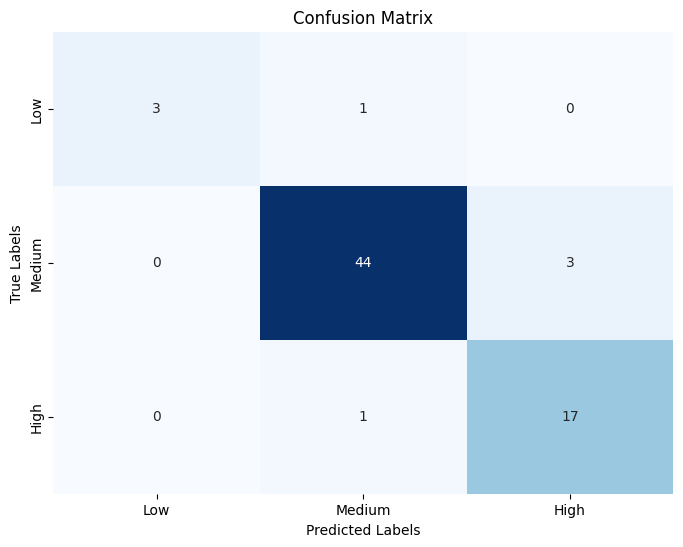

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_classes_numpy)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

With  the  accuracy and the weighted F1 score of approximately 0.93 indicates how well the model is performing in classifying the 'pain' categories (low, medium, high). 
F1 score is a metric that considers both precision and recall, providing a balance between them. 
The weighted F1 score takes into account the class imbalance in the dataset.

Here's how to interpret the weighted F1 score:

- A weighted F1 score of 1.0 would mean that the model is achieving perfect classification across all categories.
- A weighted F1 score closer to 0 indicates poorer classification performance.

In this case, a weighted F1 score of around 0.93 suggests that the model is doing a good job at classifying the 'pain' levels into low, medium, and high categories. 

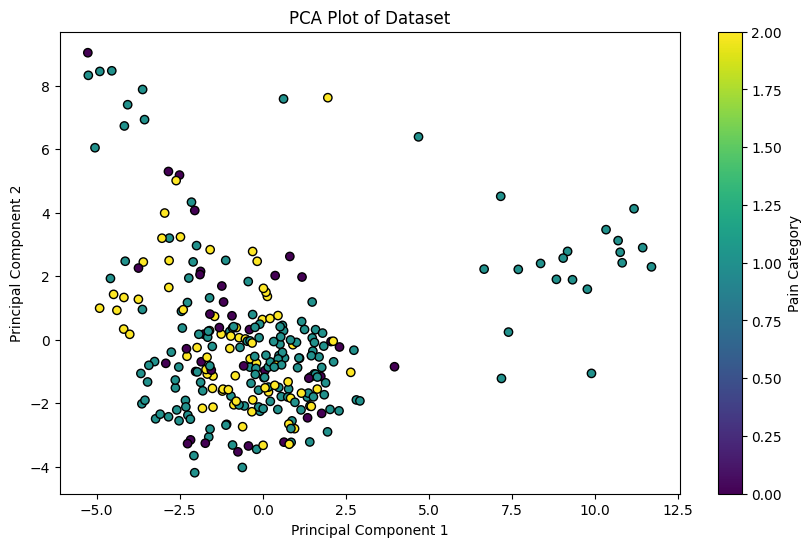

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train_scaled)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_labels, cmap='viridis', edgecolors='k')
plt.colorbar(label='Pain Category')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot of Dataset')
plt.show()